<a href="https://colab.research.google.com/github/garfield-gray/Soft-Computing/blob/main/MNSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
# to Do:
# clustering the data that you've get the labels
# calculating the cov for each cluster
# Making dictionary that takes labels to the covariances
# making the normal dist with the corresponding cov for each data
# # for -1(or 0), make the normal distributions around the mean of each point:)
# you've got the new data and so good to go!!

# Simple Implementation

## Rastrigin

In [ ]:
ObjF_S1 = lambda x: np.power(x[:,0]+5,2) + np.power(x[:,1]+5,2) -10*np.cos(2*np.pi*x[:,0]) -10*np.cos(2*np.pi*x[:,1]) + 20

In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S1           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.06234598159790039


In [ ]:
xb

[array([-4.92678836, -5.09649768]),
 array([-4.92678836, -5.09649768]),
 array([-4.92678836, -5.09649768]),
 array([-4.92678836, -5.09649768]),
 array([-4.92678836, -5.09649768]),
 array([-4.92678836, -5.09649768]),
 array([-4.95830969, -5.01370486]),
 array([-4.98893441, -5.02379099]),
 array([-4.98893441, -5.02379099]),
 array([-5.00514794, -4.99859369]),
 array([-5.00115098, -5.00298231]),
 array([-5.00016957, -4.99963088]),
 array([-4.99981206, -5.00009839]),
 array([-4.99993159, -5.0000723 ]),
 array([-5.0000297 , -5.00002754]),
 array([-4.99999864, -5.00000445]),
 array([-5.00000063, -4.99999636]),
 array([-4.99999905, -4.99999879]),
 array([-5.00000012, -5.00000002]),
 array([-5.00000004, -5.0000001 ]),
 array([-5.00000005, -5.00000001]),
 array([-4.99999999, -5.        ]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([-5., -5.]),
 array([

## Bukin Function

In [ ]:
ObjF_S2 = lambda x: 100*np.power(np.abs(x[:,1]-0.01*np.power(x[:,0], 2)),0.5)+0.01*np.abs(x[:,0]+10)

In [ ]:
ObjF_S2(np.array([[-10,1]]))

array([0.])

In [ ]:

t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 60                # Maximum Number of iterations
OBJ_F = ObjF_S2           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.08850336074829102


In [ ]:
xb

[array([6.6572074 , 0.42557673]),
 array([-10.        ,   1.00716391]),
 array([6.87492517, 0.47882791]),
 array([6.87492517, 0.47882791]),
 array([6.87492517, 0.47882791]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   

In [ ]:
# it sometimes workes:)

## Rosenbrock

In [ ]:
ObjF_S3 = lambda x: 100*np.power(x[:,1]-np.power(x[:,0], 2), 2) + np.power((1-x[:,0]), 2)

In [ ]:
ObjF_S3(np.array([[1,1]]))

array([0])

In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S3           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.04772186279296875


In [ ]:
xb

[array([-0.79378727,  0.54280528]),
 array([-0.79378727,  0.54280528]),
 array([0.33495516, 0.20482676]),
 array([0.59691297, 0.3386395 ]),
 array([0.82666181, 0.67886927]),
 array([0.92396466, 0.83983548]),
 array([0.92552922, 0.86044537]),
 array([0.96974531, 0.94416315]),
 array([0.98875458, 0.97651175]),
 array([0.99841642, 0.99711268]),
 array([1.00157857, 1.00326426]),
 array([0.99925572, 0.99853098]),
 array([1.00010835, 1.0002194 ]),
 array([1.00005139, 1.00010757]),
 array([1.00000571, 1.00000661]),
 array([1.00000057, 1.00000182]),
 array([0.99999836, 0.99999622]),
 array([0.99999797, 0.99999597]),
 array([0.99999967, 0.99999934]),
 array([0.99999986, 0.99999975]),
 array([0.99999991, 0.99999983]),
 array([1.        , 0.99999999]),
 array([0.99999999, 0.99999999]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.])

## Beale

In [ ]:
ObjF_S4 = lambda x: np.power(1.5-x[:,0]+x[:,0]*x[:,1], 2) + np.power(2.25-x[:,0]+x[:,0]*np.power(x[:,1], 2), 2) + np.power(2.625-x[:,0]+x[:,0]*np.power(x[:,1], 3), 2)

In [ ]:
ObjF_S4(np.array([[3, 0.5]]))

array([0.])

In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S4           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.04153919219970703


In [ ]:
xb

[array([2.27326047, 0.07873359]),
 array([4.41642796, 0.68922369]),
 array([3.930467  , 0.68542768]),
 array([3.930467  , 0.68542768]),
 array([3.33333395, 0.58663699]),
 array([3.10558731, 0.53737679]),
 array([3.01893184, 0.50513672]),
 array([2.98223053, 0.49600368]),
 array([3.00667812, 0.50225427]),
 array([2.99975171, 0.49991532]),
 array([2.99975171, 0.49991532]),
 array([2.99983867, 0.49996958]),
 array([2.99996252, 0.49999024]),
 array([3.00002337, 0.50000615]),
 array([2.99999094, 0.49999788]),
 array([3.00000552, 0.50000121]),
 array([3.00000044, 0.50000014]),
 array([2.99999966, 0.49999992]),
 array([3.00000008, 0.50000001]),
 array([3.00000002, 0.50000001]),
 array([3.00000002, 0.5       ]),
 array([3.00000001, 0.5       ]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. ,

# New Ideas

## DB scan

In [2]:
from sklearn.cluster import DBSCAN

### First Demonstration

In [3]:
ObjF_S1 = lambda x: np.power(x[:,0]+5,2) + np.power(x[:,1]+5,2) -10*np.cos(2*np.pi*x[:,0]) -10*np.cos(2*np.pi*x[:,1]) + 20

1.3383158829473527


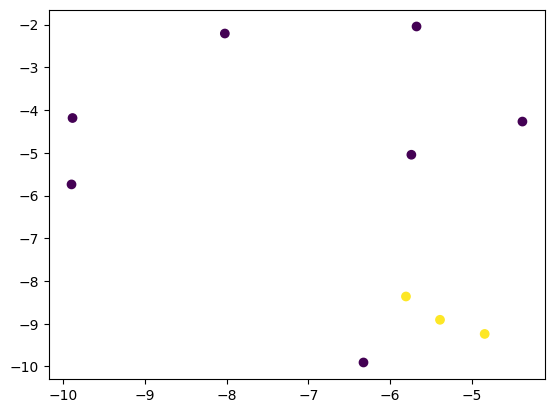

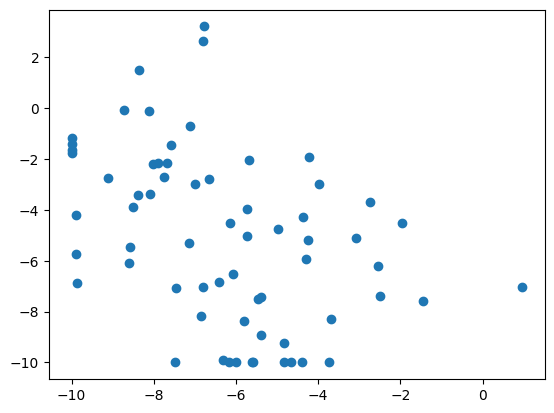

0.9027511707514349


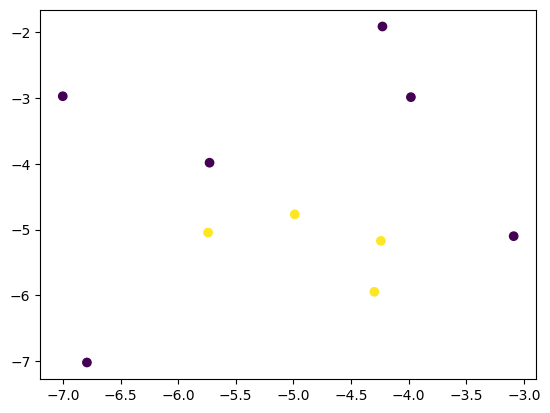

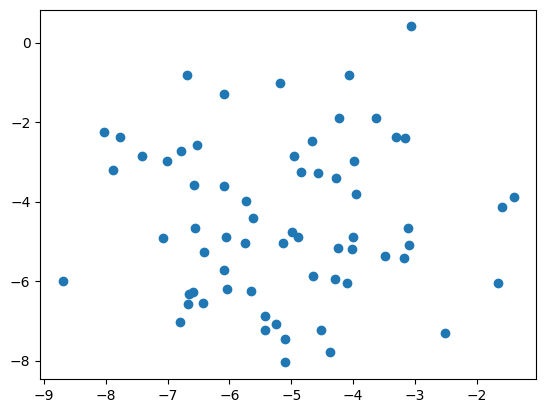

0.7044173224637813


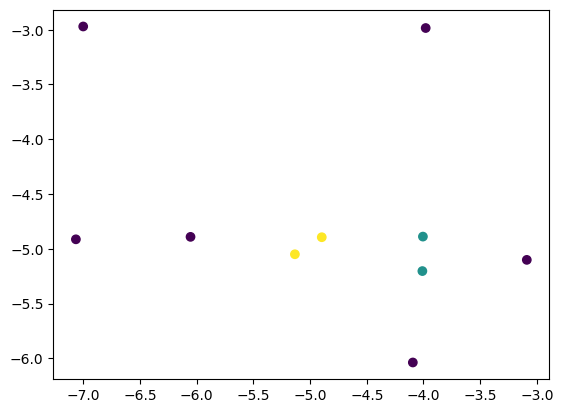

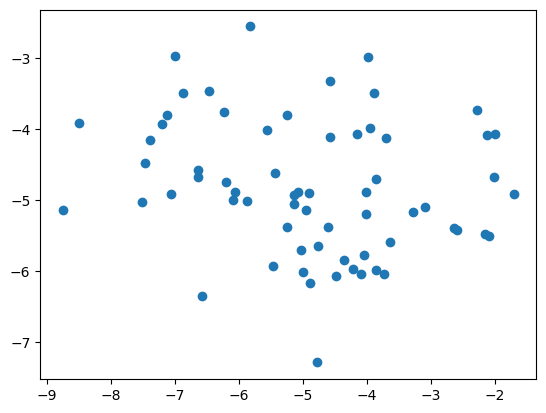

0.41997108441692427


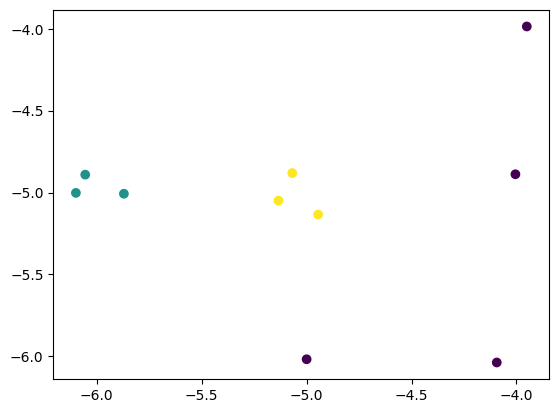

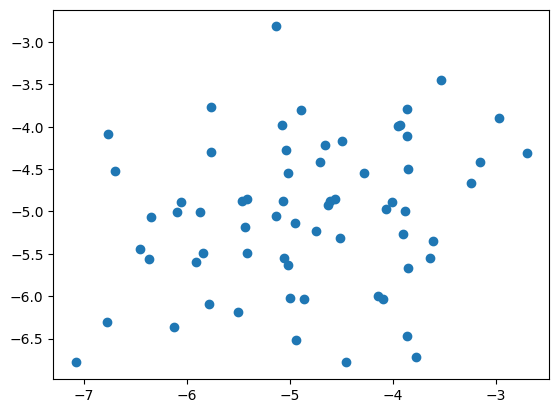

0.42542119223280517


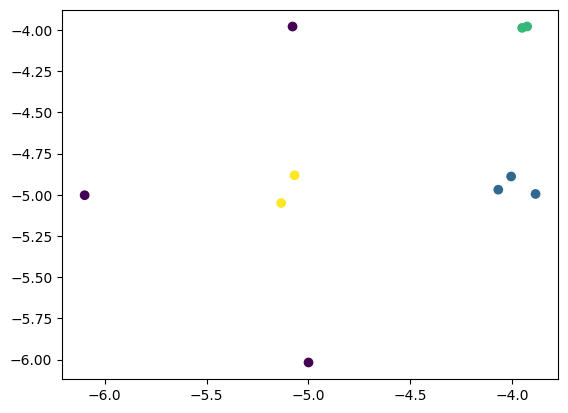

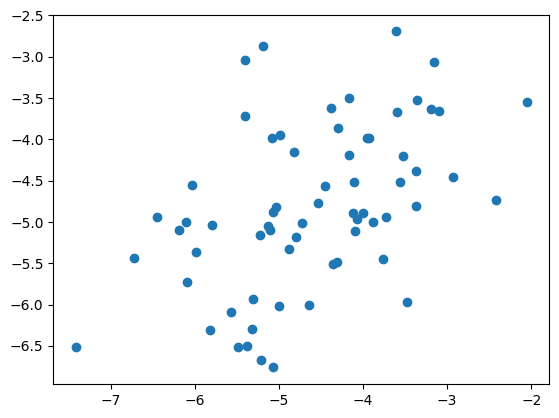

0.42844411533709675


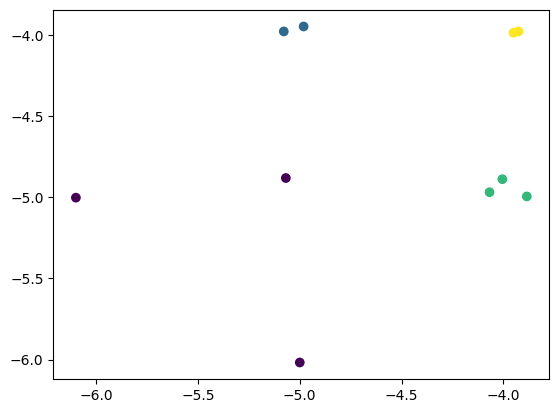

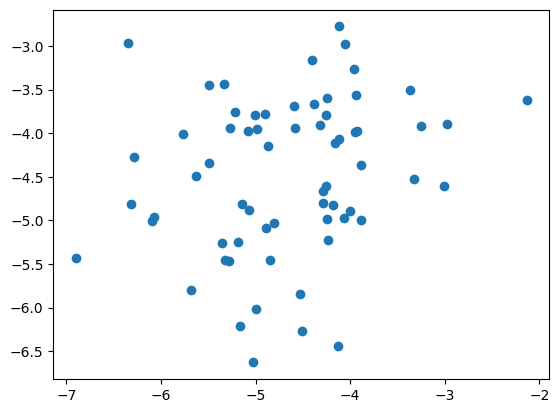

0.4243250729259126


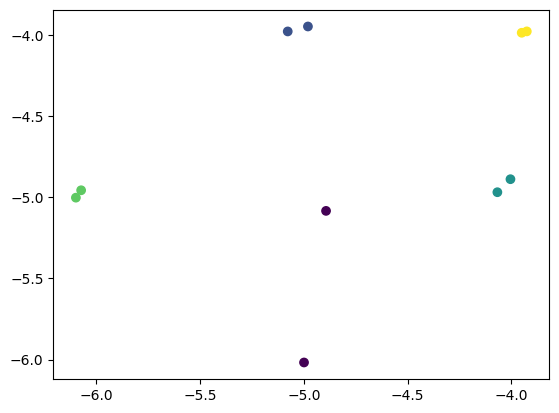

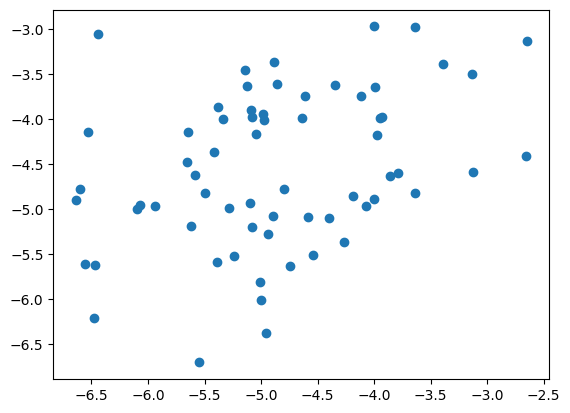

0.421869769670162


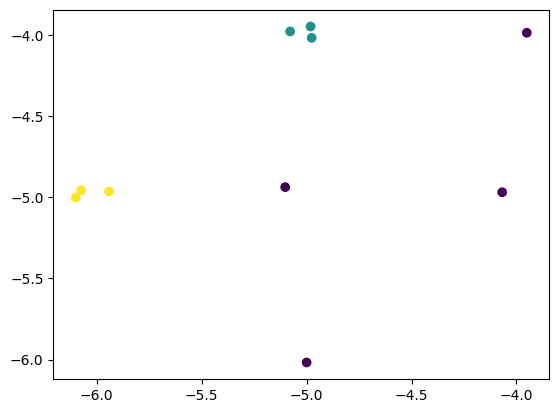

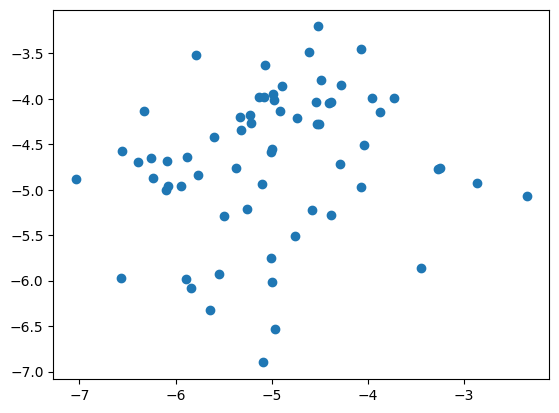

0.421869769670162


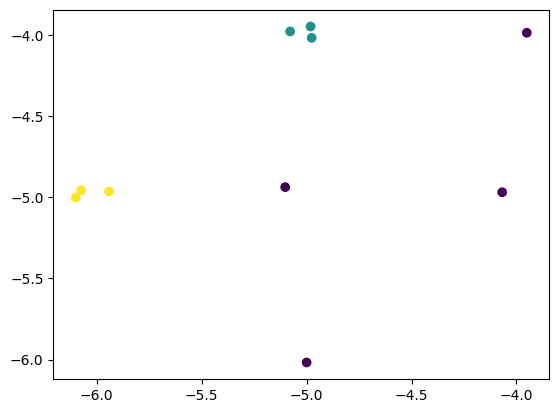

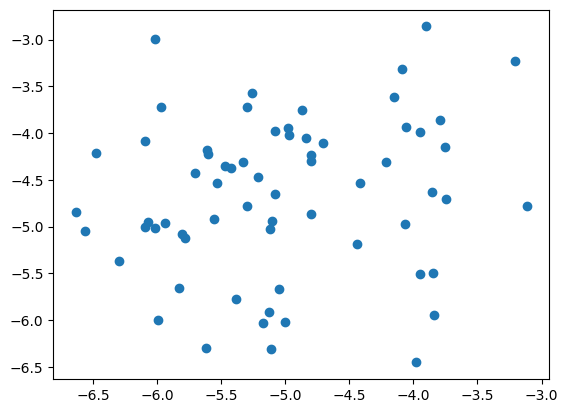

0.41934309874912296


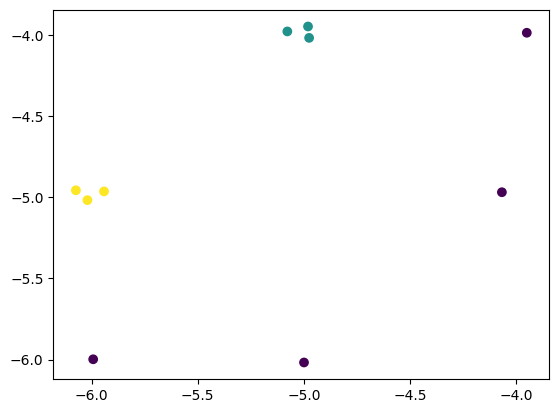

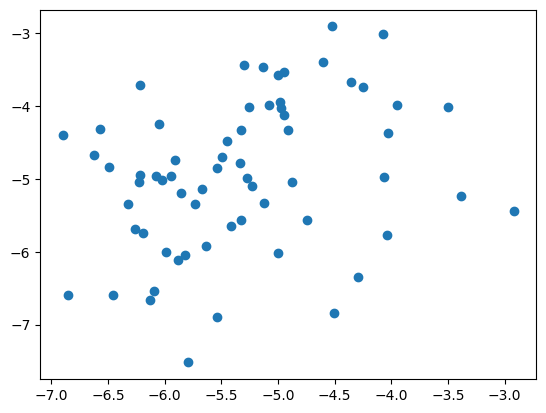

0.41934309874912296


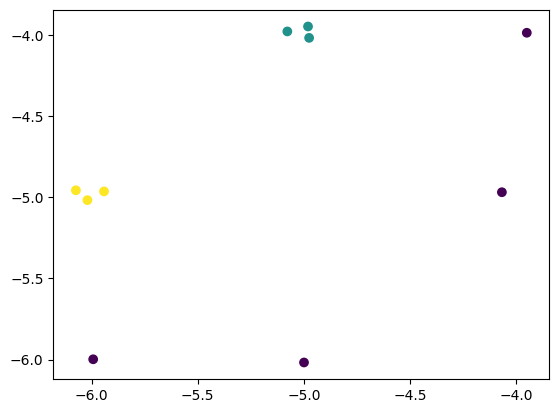

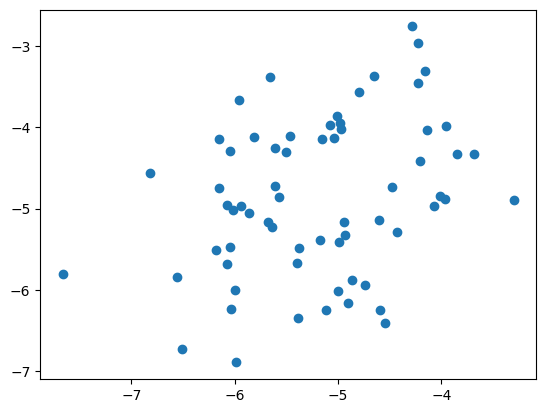

0.41934309874912296


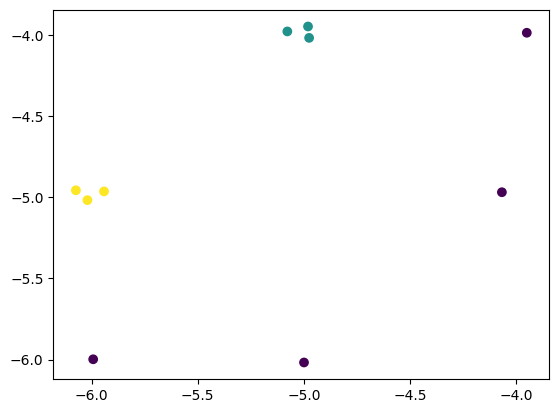

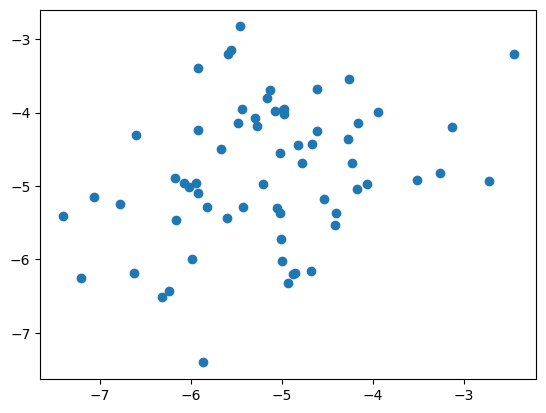

0.4076179585177437


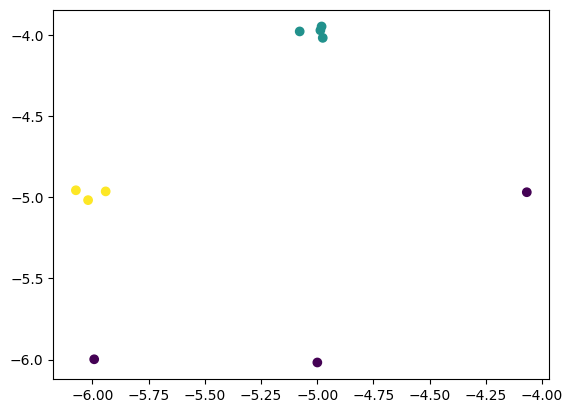

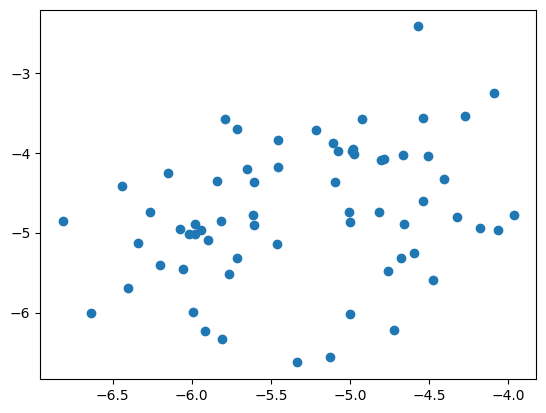

0.4021956677175681


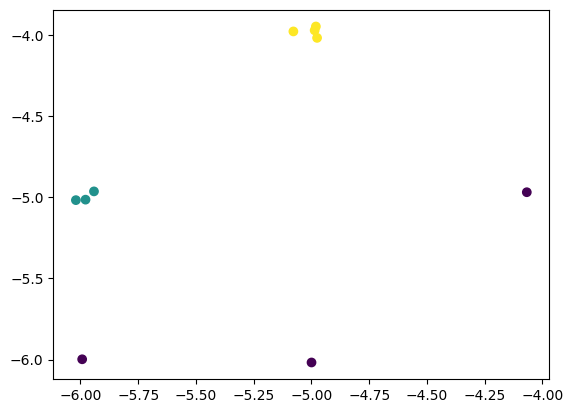

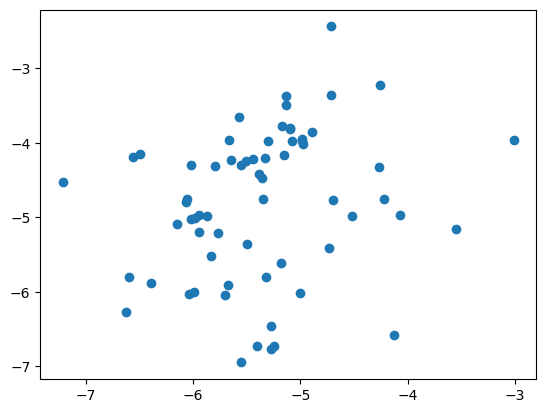

0.4021956677175681


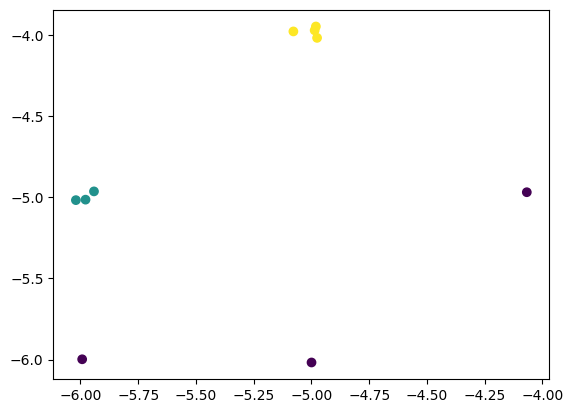

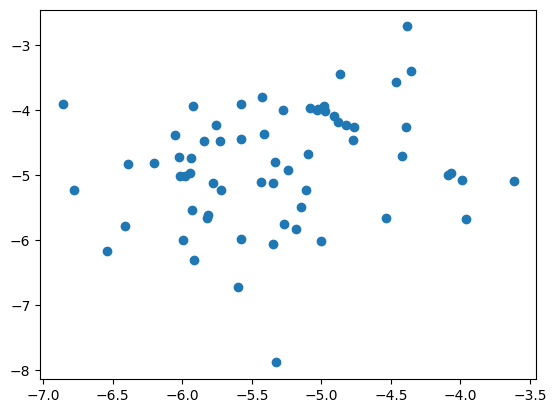

0.4021956677175681


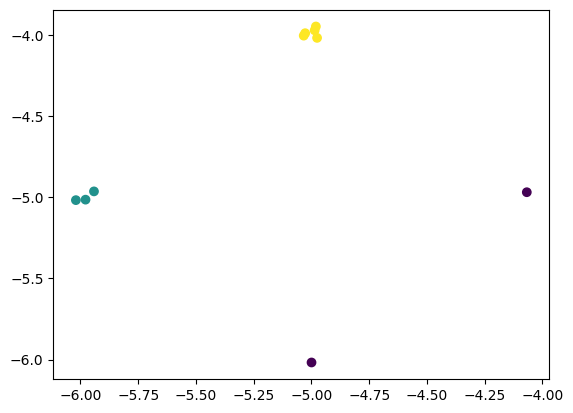

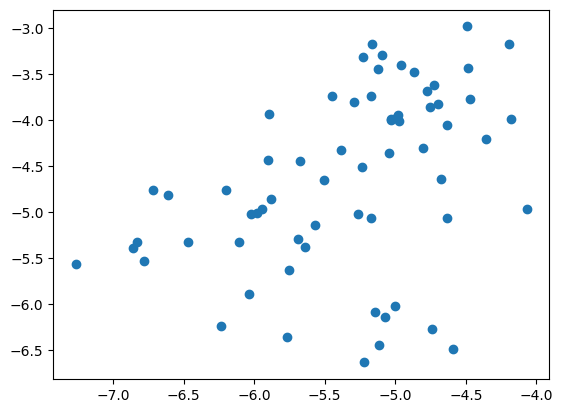

0.4021956677175681


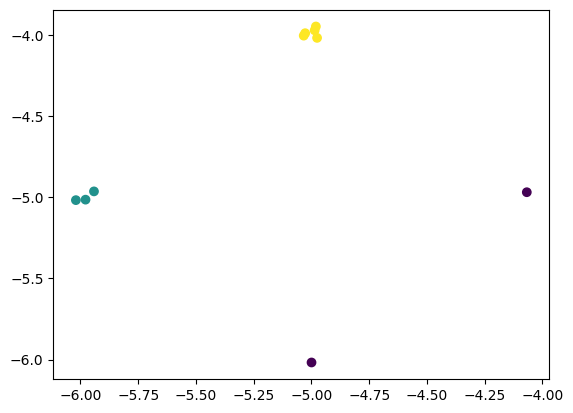

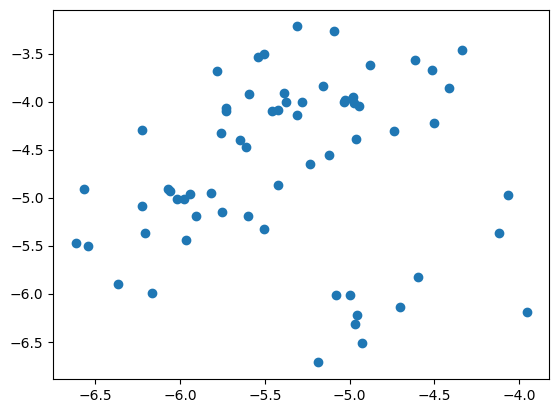

0.4021956677175681


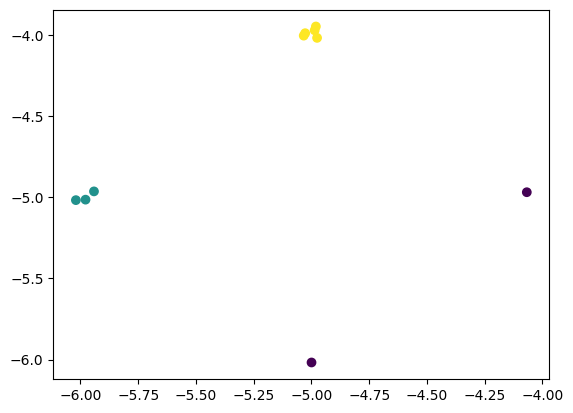

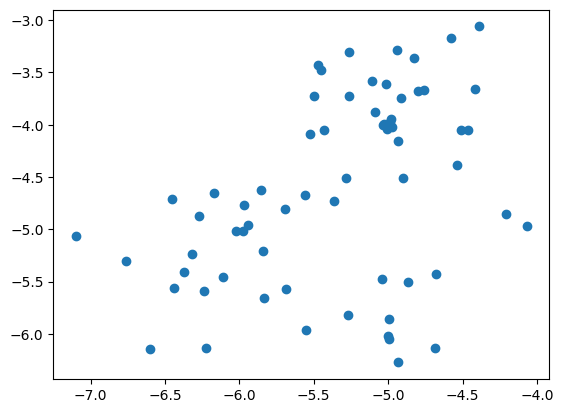

0.3141327609946981


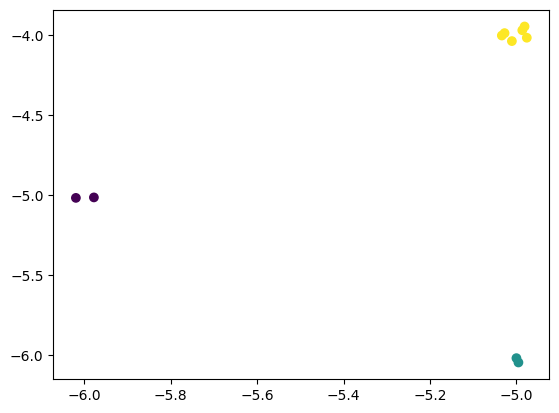

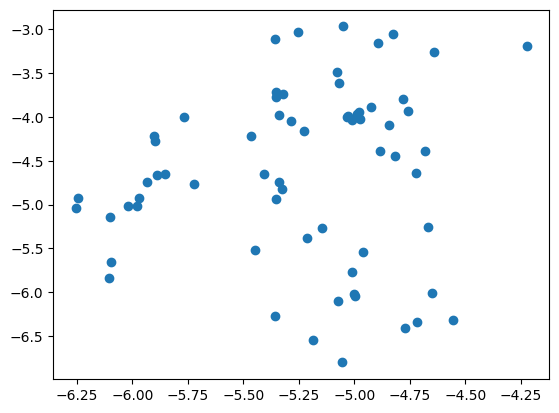

0.3141327609946981


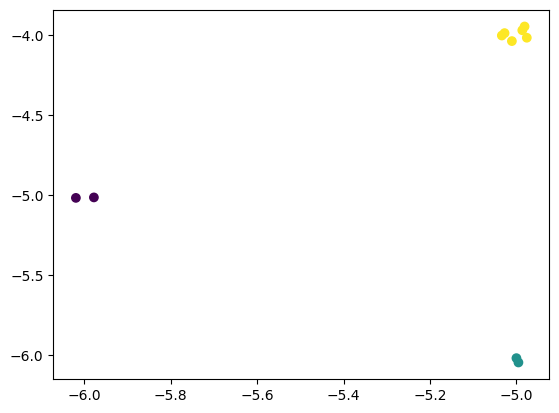

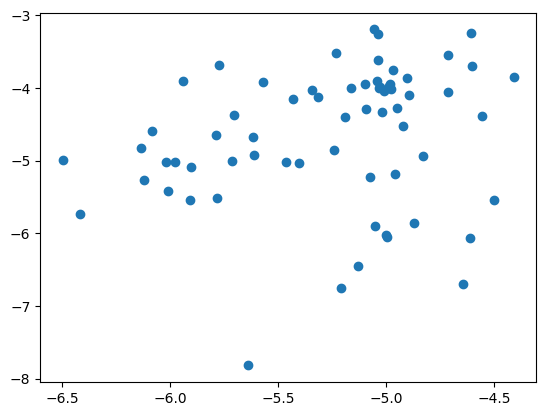

0.3141327609946981


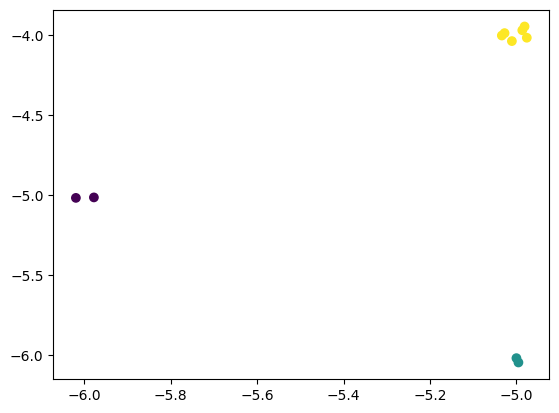

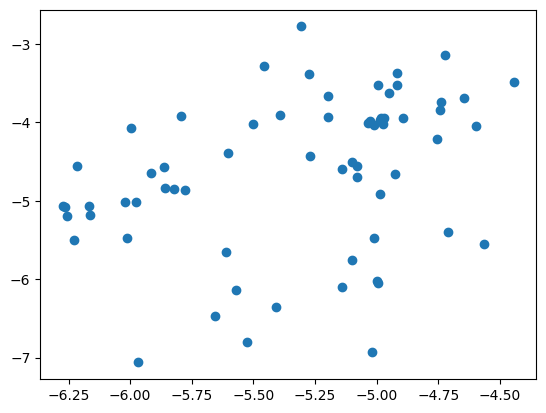

0.311770834483755


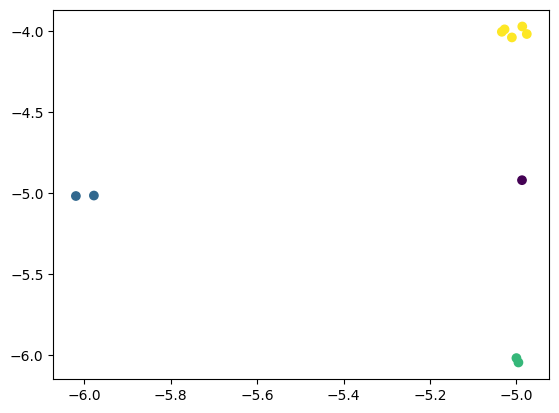

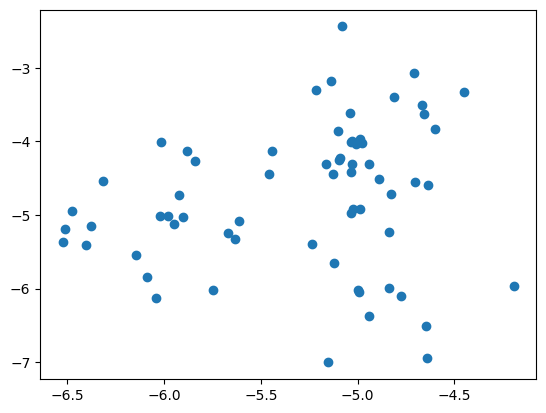

0.30905667887910576


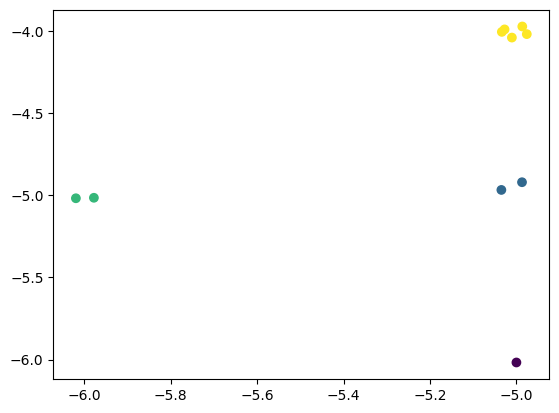

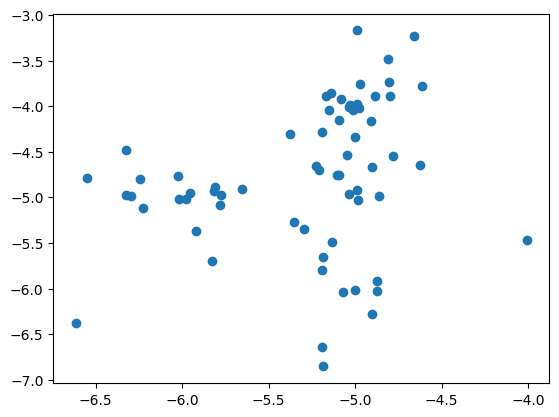

0.30905667887910576


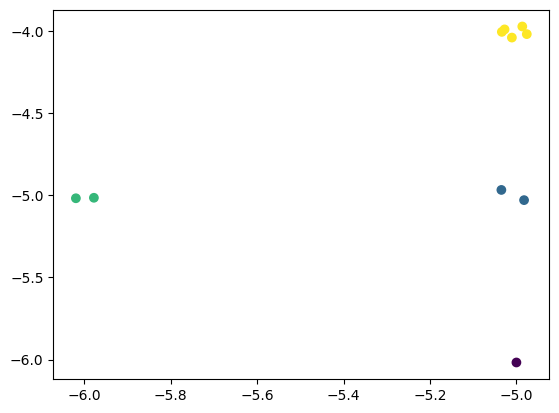

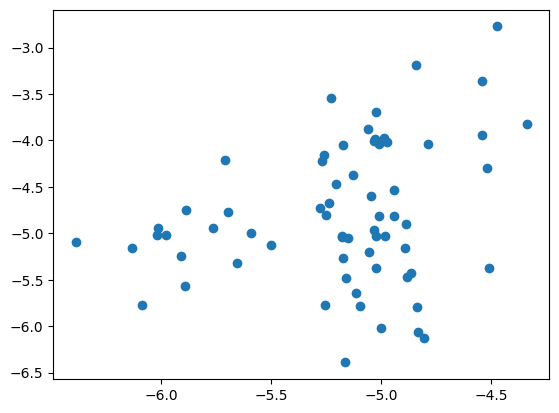

0.30728057081788696


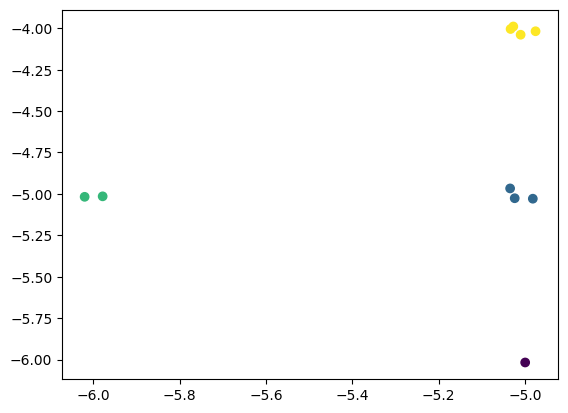

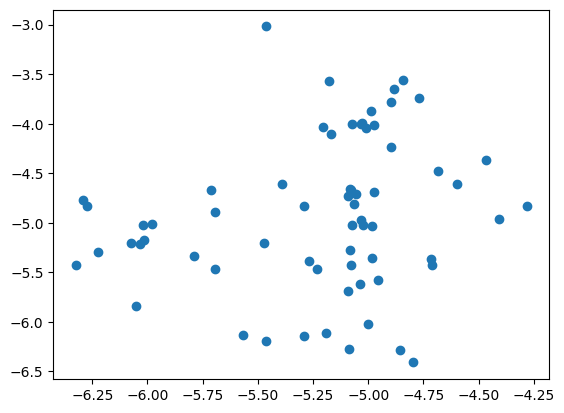

0.30728057081788696


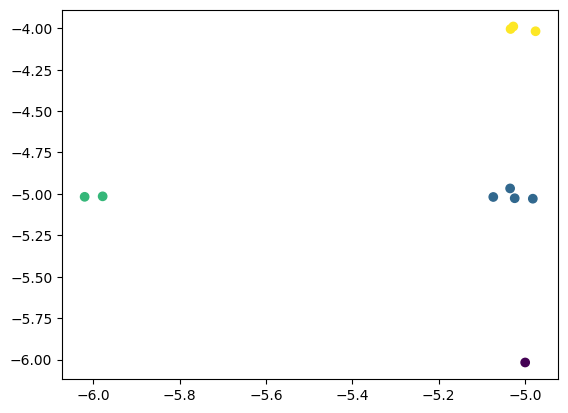

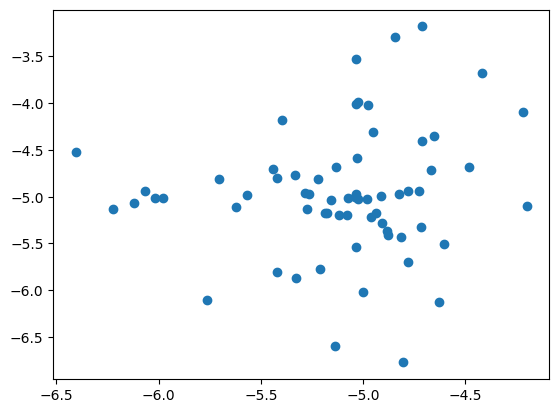

0.30728057081788696


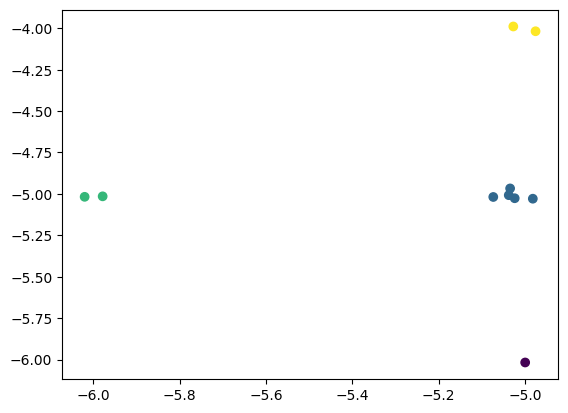

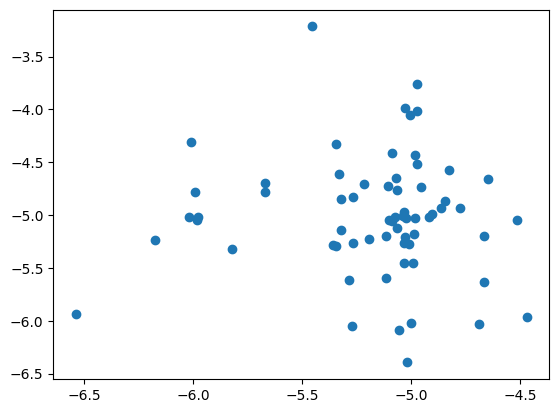

0.30728057081788696


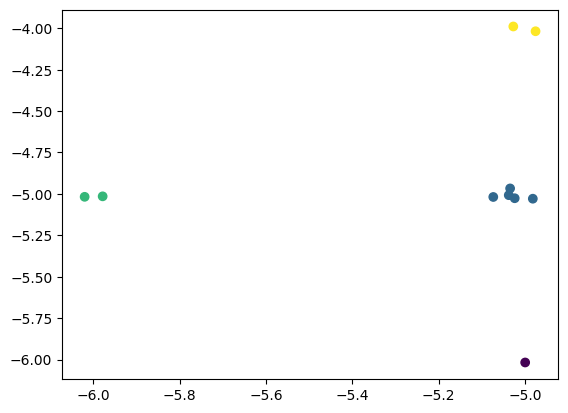

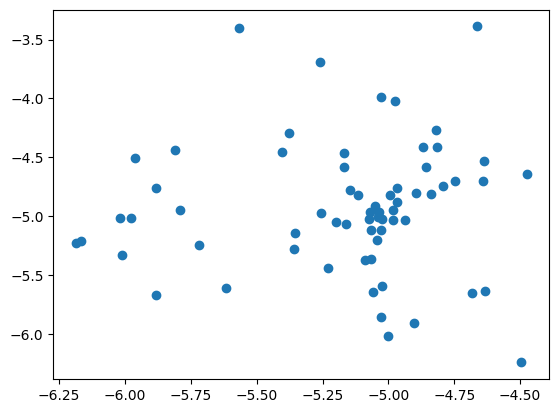

0.30418034160440943


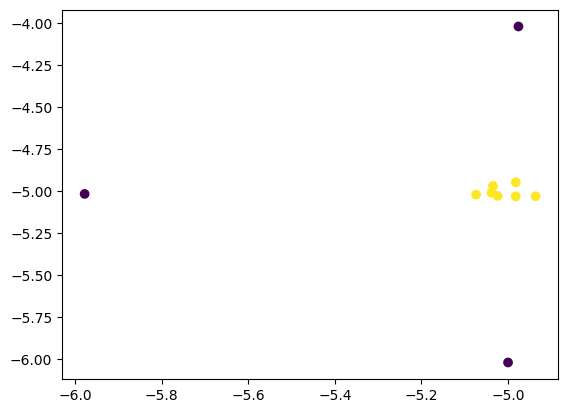

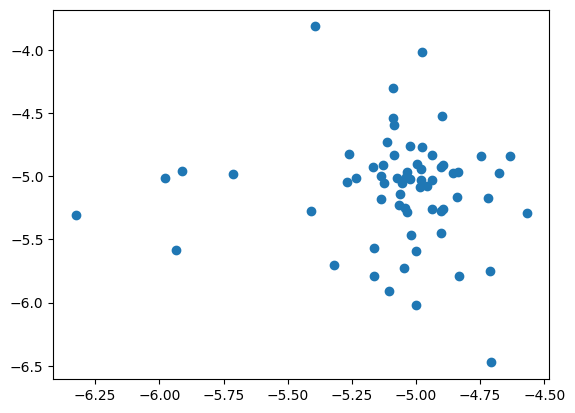

0.2114290006489825


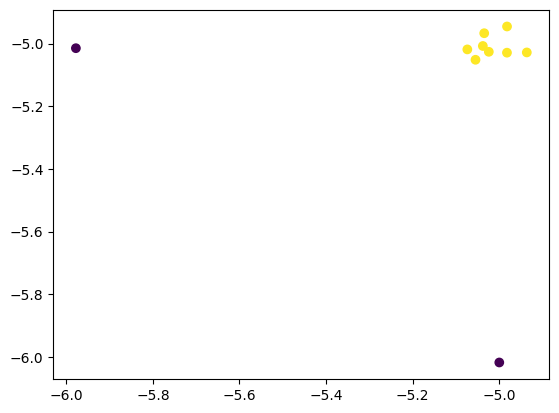

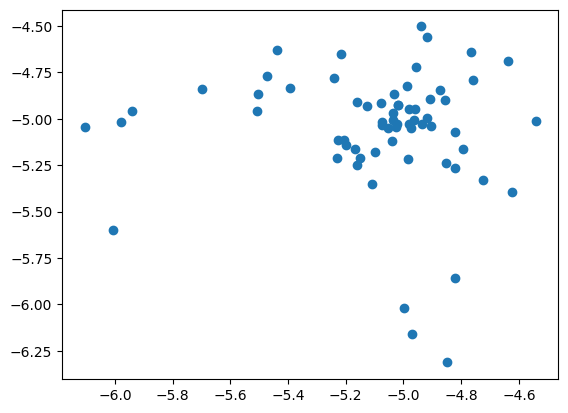

0.02064062197129566


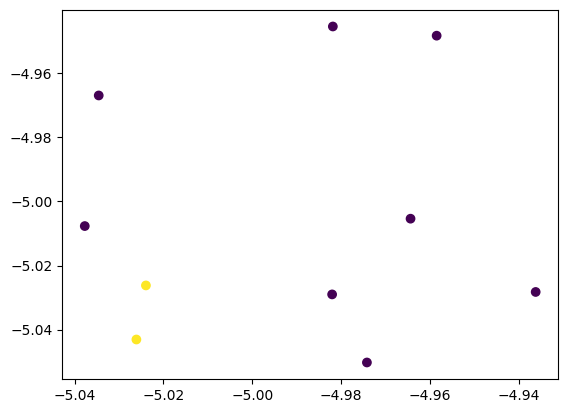

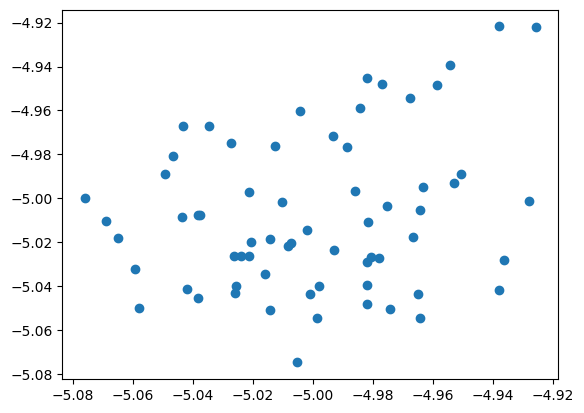

0.007249248749472059


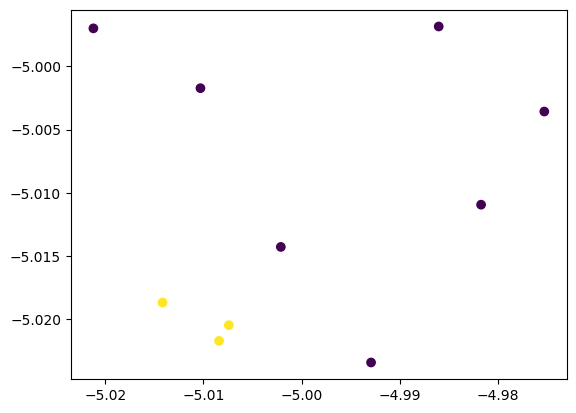

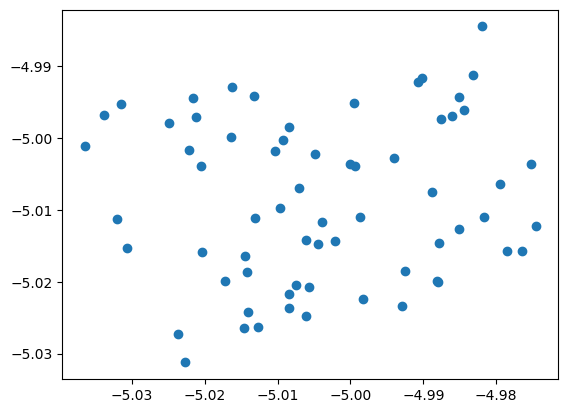

0.003218357418336293


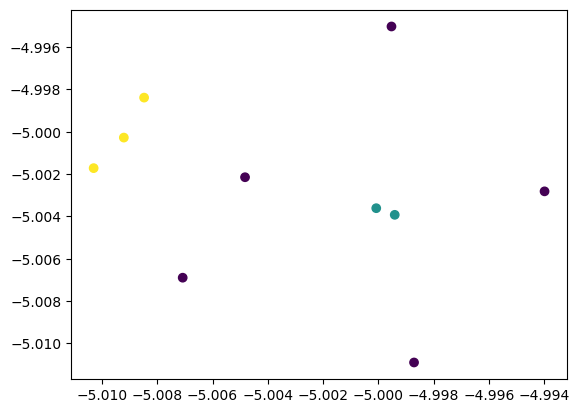

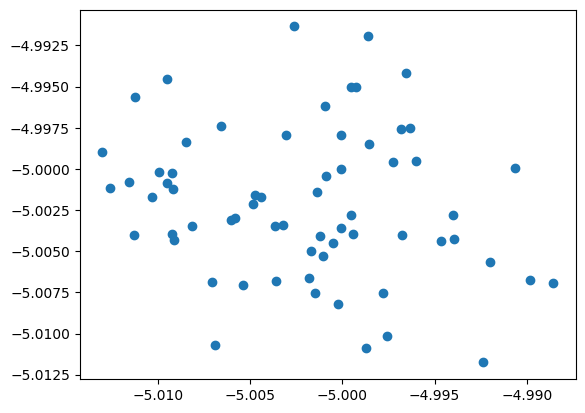

0.0013215345257217236


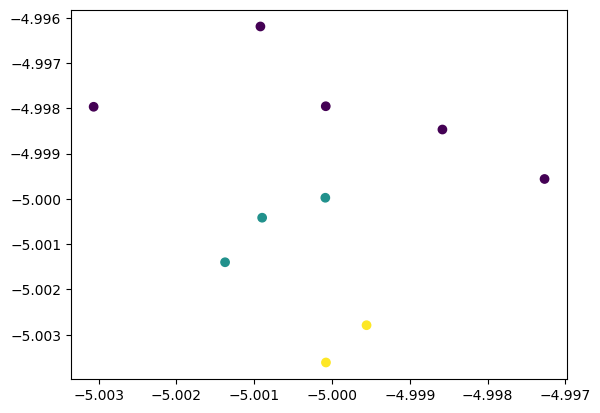

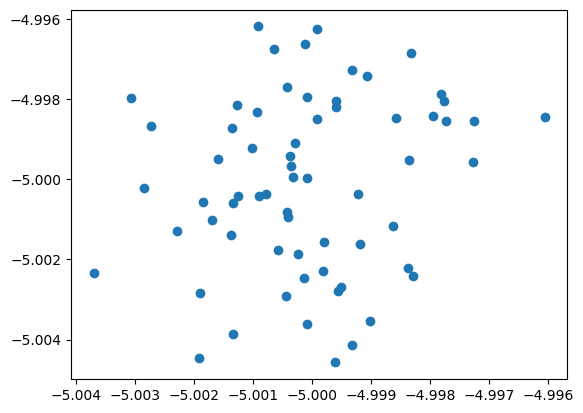

0.00035067041596867907


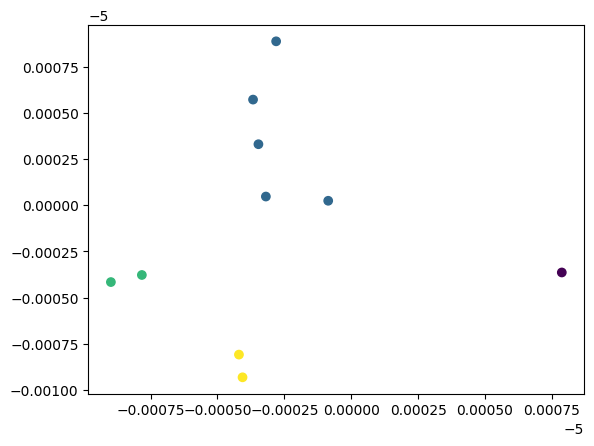

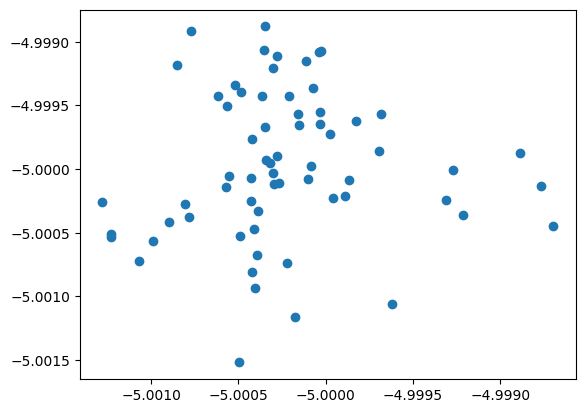

9.430080769403659e-05


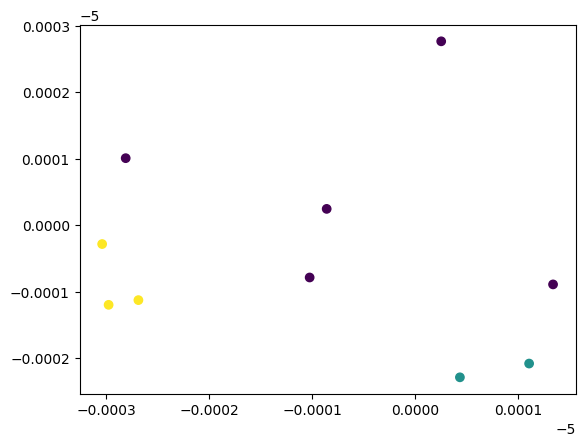

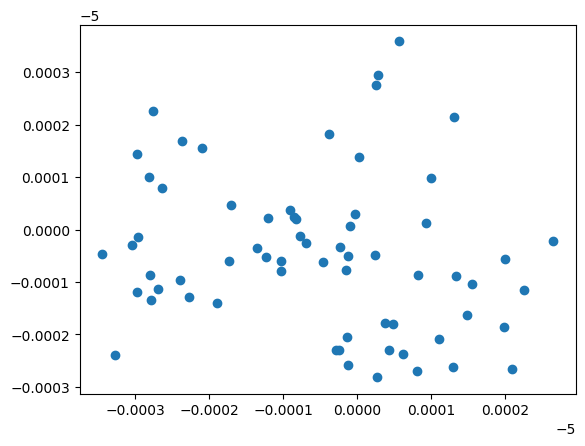

2.1407210407886623e-05


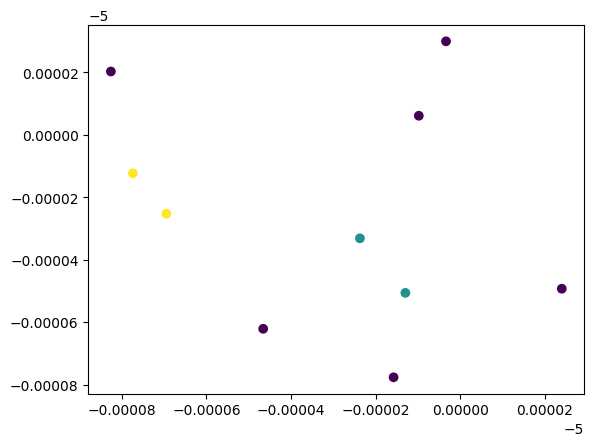

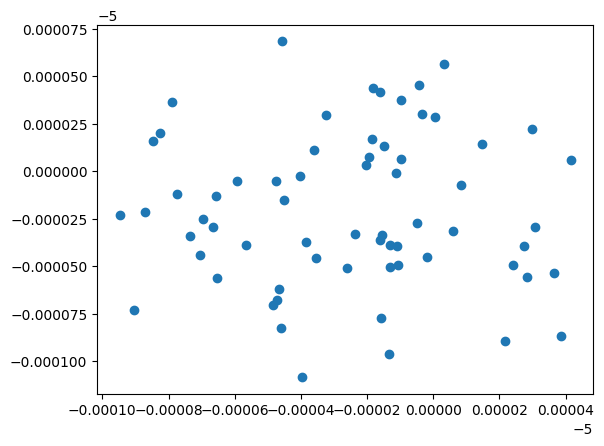

9.079169459180746e-06


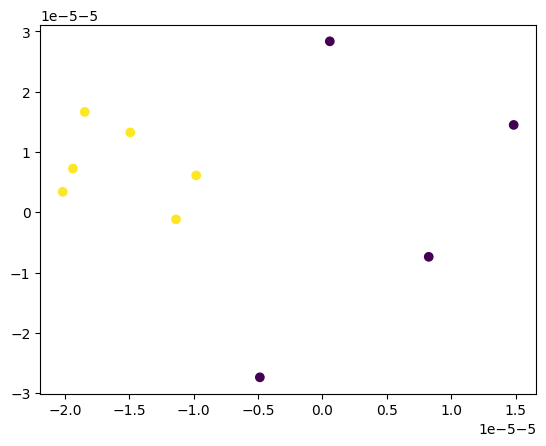

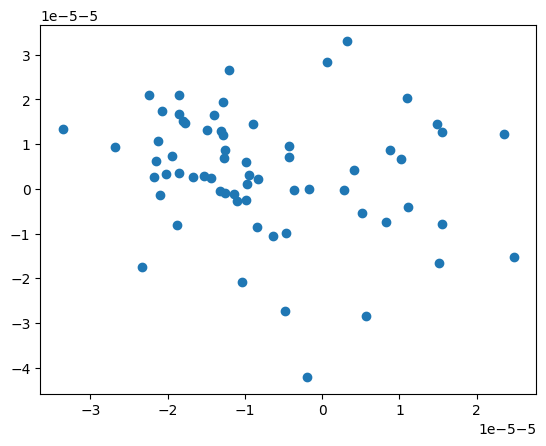

2.7417952154884516e-06


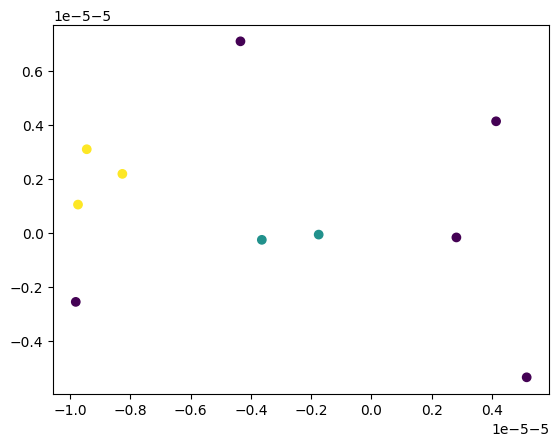

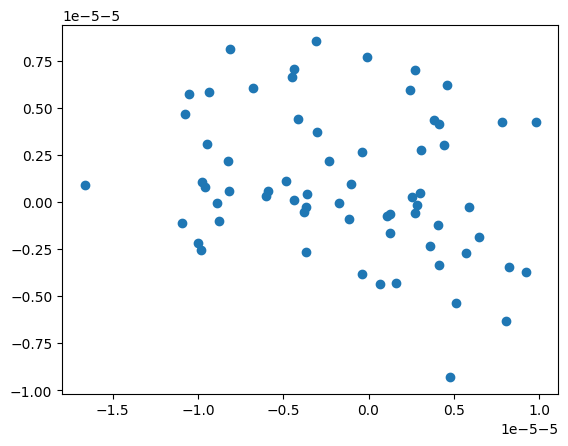

8.86007781986109e-07


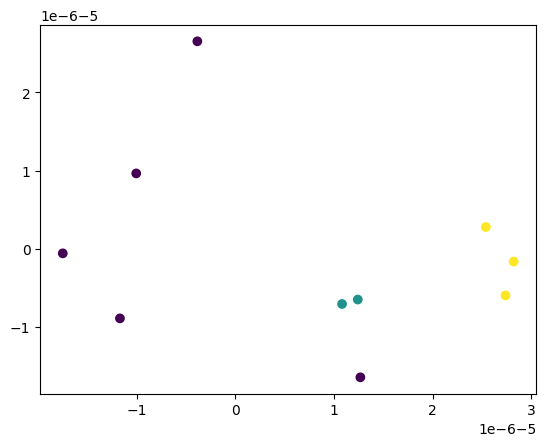

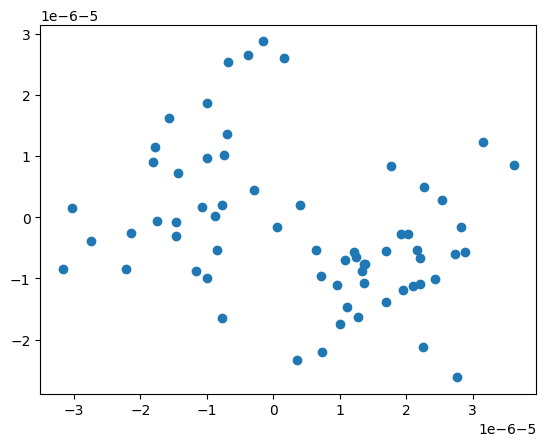

32.55490016937256


In [4]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S1           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  # plt.scatter(x[:,0], x[:,1])
  # plt.show()







  epsilon = 2*np.mean(np.max(x, axis=0)-np.min(x, axis=0))/NS
  print(epsilon)
  clustering = DBSCAN(eps=epsilon, min_samples=2).fit(x)
  clustering.labels_
  # clustering
  plt.scatter(x[:,0], x[:,1], c = clustering.labels_)
  plt.show()



  a = np.power(0.3, (it/MAXIT))


  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  plt.scatter(x[:,0], x[:,1])
  plt.show()
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

In [5]:
# it clearly Doesn't work well at clustering
xb

[array([-3.98038897, -2.98475435]),
 array([-4.00489791, -4.8886755 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-4.99974597, -6.0179416 ]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.97793524, -5.01470479]),
 array([-5.03458581, -4.96692376]),
 array([-4.98202935, -5.02901794]),
 array([-4.98202935, -5.02901794]),
 array([-4.98202935, -5.02901794]),
 array([-4.98202935, -5.02901794]),
 array([-4.98202935, -5.02901794]),
 array([-4.98202935, -5.0290

### Performing The Clustering

In [6]:
ObjF_S1 = lambda x: np.power(x[:,0]+5,2) + np.power(x[:,1]+5,2) -10*np.cos(2*np.pi*x[:,0]) -10*np.cos(2*np.pi*x[:,1]) + 20

1.8993932867563
0
[[-4.30808486 -2.028163  ]
 [-4.52712172 -2.06467474]]
1
[[-1.63529834 -4.02326146]
 [-1.6143379  -5.3525335 ]]
2
[[-2.65709306 -9.9883189 ]
 [-3.60380511 -8.63374358]]
-1
[[-3.9019193  -5.06175128]
 [-6.94486453 -6.15904583]
 [-8.71647512 -3.01091523]
 [-8.84932829 -6.2567229 ]]


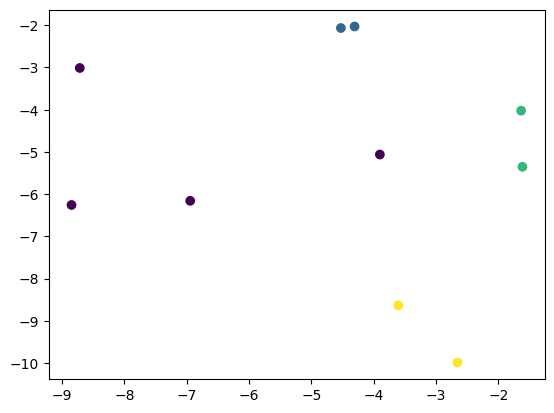

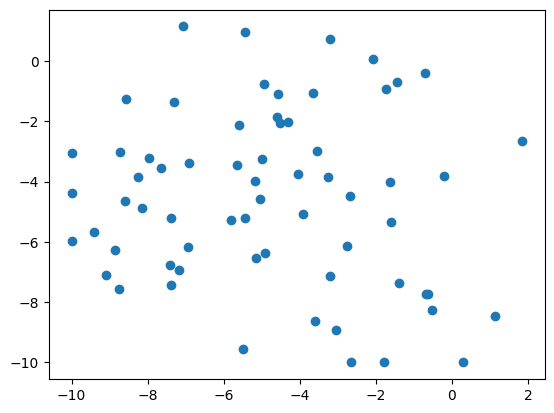

1.153280161669993
0
[[-5.18307601 -3.99016507]
 [-4.04649266 -3.75071351]
 [-5.00527744 -3.26055273]]
1
[[-6.94486453 -6.15904583]
 [-7.18617106 -6.94531358]]
2
[[-3.21745103 -7.11876841]
 [-2.76975435 -6.13553693]]
-1
[[-3.9019193  -5.06175128]
 [-8.13777996 -4.88251762]
 [-5.81537343 -5.27327005]]


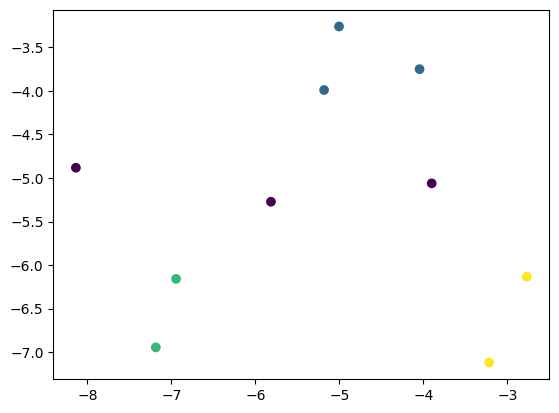

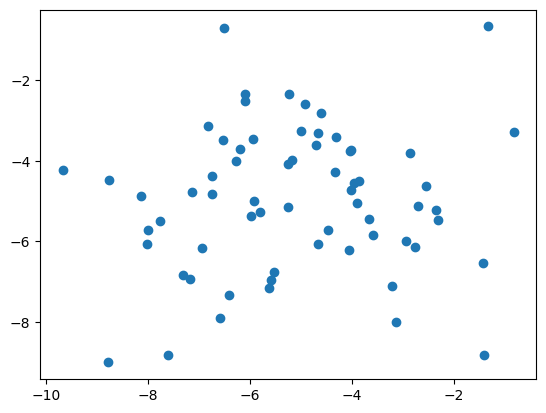

0.9430497857169822
0
[[-3.9019193  -5.06175128]
 [-4.02344675 -4.73384532]]
1
[[-5.18307601 -3.99016507]
 [-5.25591008 -4.07429324]]
-1
[[-5.92312685 -4.99228902]
 [-2.94450057 -5.99554296]
 [-6.94486453 -6.15904583]
 [-4.06460196 -6.21943814]
 [-8.02017424 -6.07035538]
 [-4.04649266 -3.75071351]]


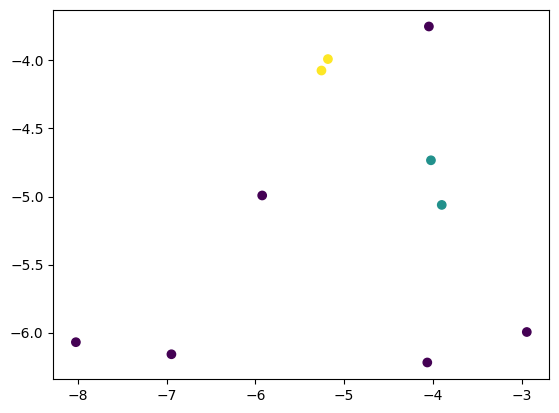

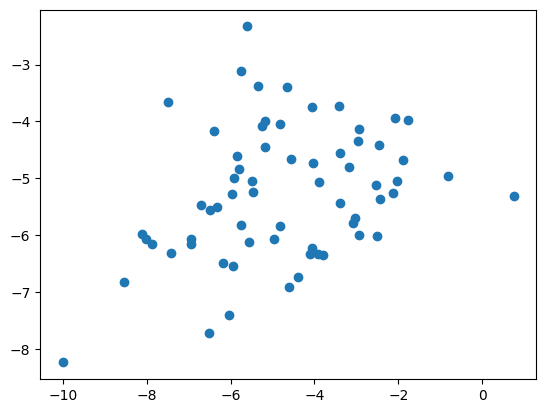

0.8864984110552907
0
[[-6.95057251 -6.06253552]
 [-6.94486453 -6.15904583]]
1
[[-4.83097933 -4.05213836]
 [-5.18307601 -3.99016507]]
-1
[[-5.92312685 -4.99228902]
 [-4.95299879 -6.0733252 ]
 [-3.9019193  -5.06175128]
 [-2.94450057 -5.99554296]
 [-2.94713756 -4.13308895]
 [-2.02746599 -5.05659148]]


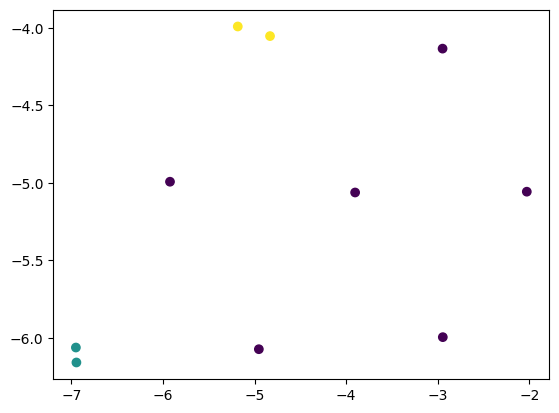

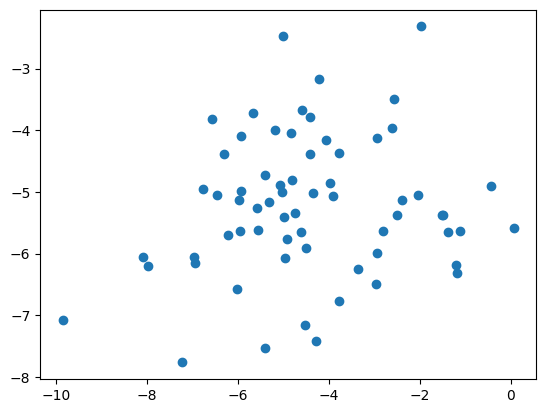

0.7489840771171842
0
[[-5.02248039 -4.99588686]
 [-5.07563336 -4.88785536]]
1
[[-5.92312685 -4.99228902]
 [-5.96974884 -5.13623815]]
2
[[-3.9019193  -5.06175128]
 [-3.96189283 -4.85134016]]
-1
[[-4.95299879 -6.0733252 ]
 [-5.93411488 -4.08752452]
 [-2.94450057 -5.99554296]
 [-6.95057251 -6.06253552]]


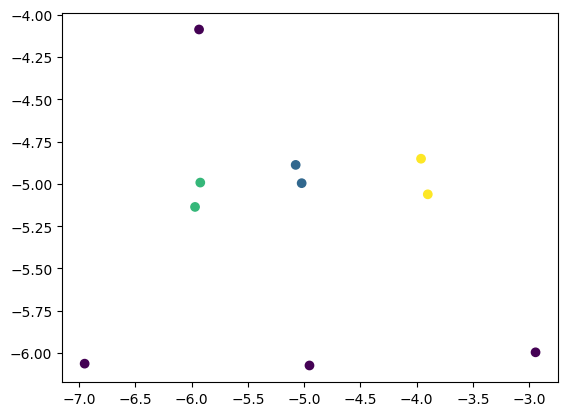

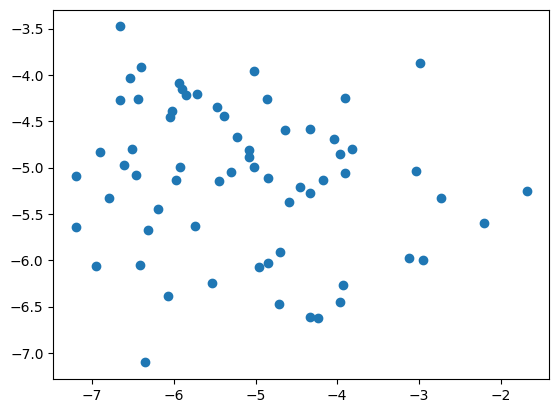

0.631580457468411
0
[[-5.02248039 -4.99588686]
 [-5.07563336 -4.88785536]]
1
[[-5.92312685 -4.99228902]
 [-5.96974884 -5.13623815]]
2
[[-3.9019193  -5.06175128]
 [-3.96189283 -4.85134016]]
-1
[[-5.0135407  -3.955765  ]
 [-4.95299879 -6.0733252 ]
 [-5.93411488 -4.08752452]
 [-3.03466538 -5.03161982]]


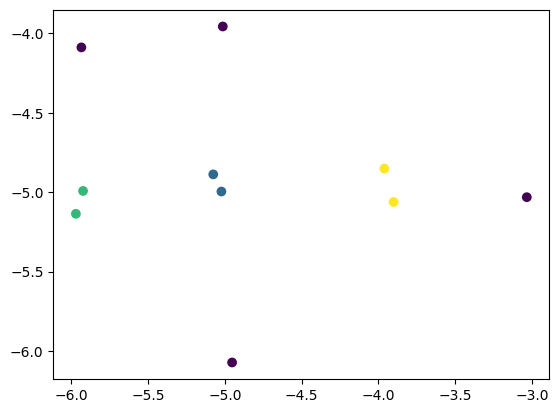

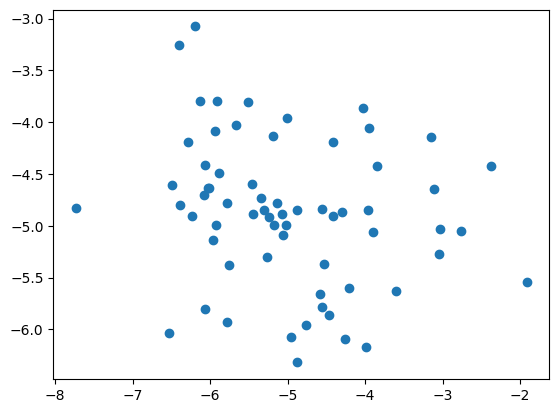

0.6271262130617513
0
[[-5.02248039 -4.99588686]
 [-5.05489625 -5.08550689]
 [-5.07563336 -4.88785536]]
-1
[[-5.0135407  -3.955765  ]
 [-5.92312685 -4.99228902]
 [-4.95299879 -6.0733252 ]
 [-3.9531152  -4.05540366]
 [-3.9019193  -5.06175128]
 [-5.93411488 -4.08752452]
 [-3.03466538 -5.03161982]]


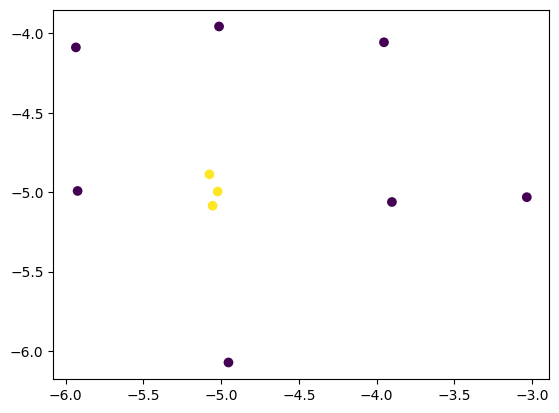

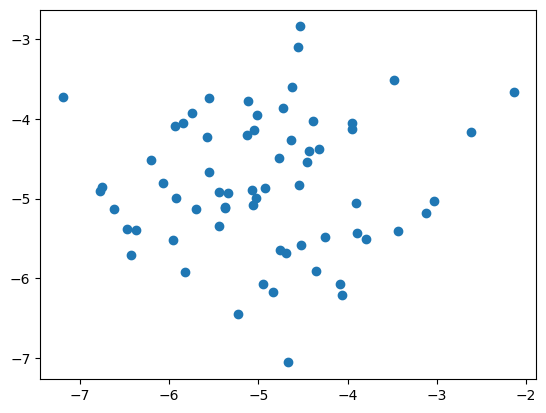

0.5187194722064661
0
[[-5.02248039 -4.99588686]
 [-5.05489625 -5.08550689]
 [-5.07563336 -4.88785536]
 [-4.92148567 -4.87428413]]
-1
[[-5.0135407  -3.955765  ]
 [-5.92312685 -4.99228902]
 [-4.95299879 -6.0733252 ]
 [-3.9531152  -4.05540366]
 [-3.9019193  -5.06175128]
 [-5.93411488 -4.08752452]]


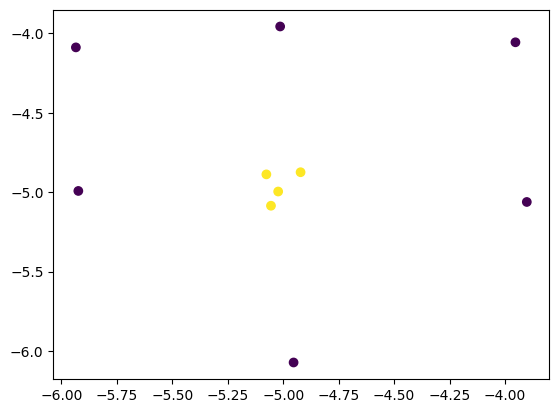

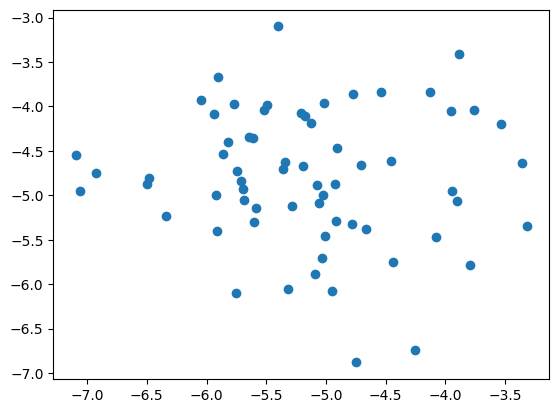

0.536673984044493
0
[[-5.02248039 -4.99588686]
 [-5.05489625 -5.08550689]
 [-5.07563336 -4.88785536]]
1
[[-3.94200808 -4.95295439]
 [-3.9019193  -5.06175128]]
-1
[[-5.0135407  -3.955765  ]
 [-5.92312685 -4.99228902]
 [-4.95299879 -6.0733252 ]
 [-3.9531152  -4.05540366]
 [-6.04950831 -3.92752233]]


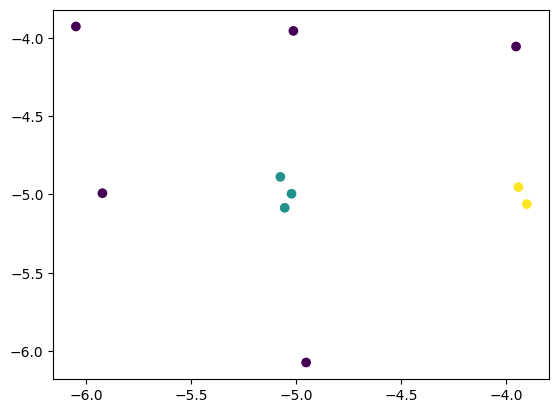

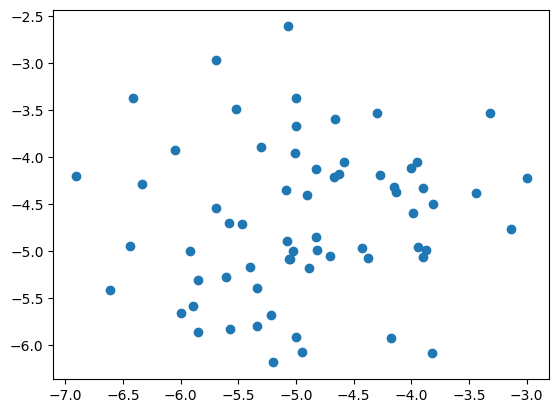

0.5123348717627958
0
[[-5.02248039 -4.99588686]
 [-5.05944398 -5.08029787]
 [-5.05489625 -5.08550689]
 [-5.07563336 -4.88785536]]
1
[[-4.99876082 -5.91302356]
 [-4.95299879 -6.0733252 ]]
-1
[[-5.0135407  -3.955765  ]
 [-5.92312685 -4.99228902]
 [-3.94200808 -4.95295439]
 [-3.9531152  -4.05540366]]


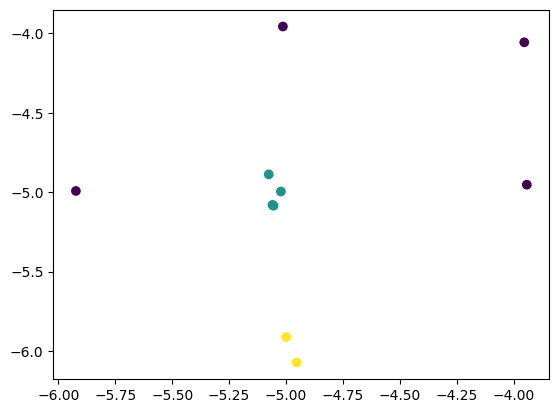

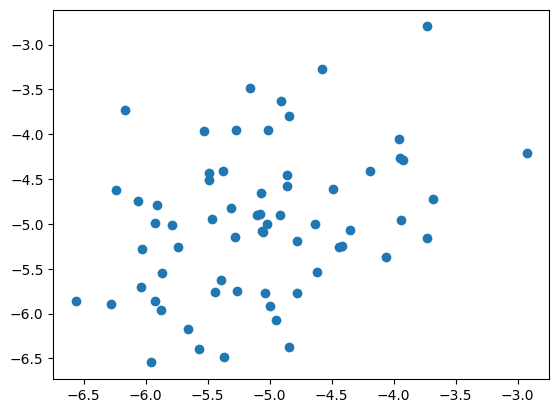

0.5123348717627958
0
[[-5.02248039 -4.99588686]
 [-5.05944398 -5.08029787]
 [-5.05489625 -5.08550689]
 [-4.91951458 -4.89683689]]
1
[[-4.99876082 -5.91302356]
 [-4.95299879 -6.0733252 ]]
-1
[[-5.0135407  -3.955765  ]
 [-5.92312685 -4.99228902]
 [-3.94200808 -4.95295439]
 [-3.9531152  -4.05540366]]


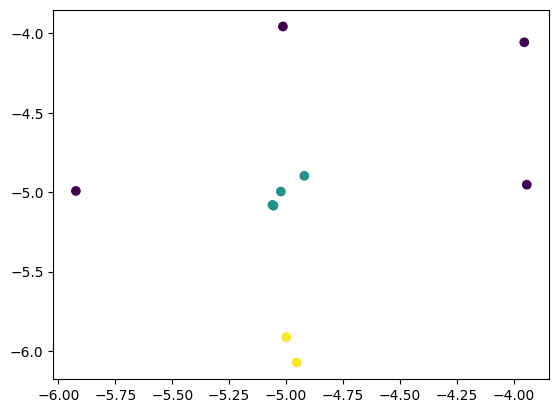

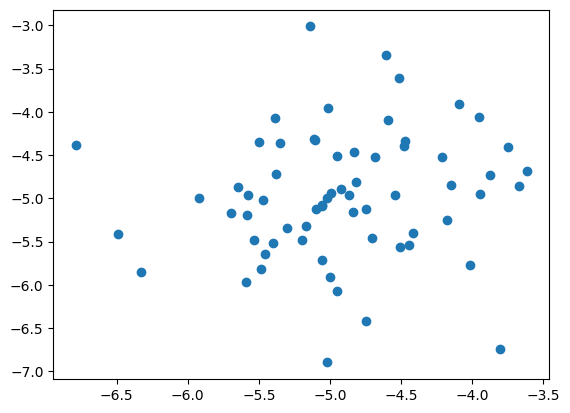

0.5123348717627958
0
[[-5.02248039 -4.99588686]
 [-4.99019978 -4.93817774]
 [-5.05944398 -5.08029787]
 [-5.05489625 -5.08550689]]
1
[[-4.99876082 -5.91302356]
 [-4.95299879 -6.0733252 ]]
-1
[[-5.0135407  -3.955765  ]
 [-5.92312685 -4.99228902]
 [-3.94200808 -4.95295439]
 [-3.9531152  -4.05540366]]


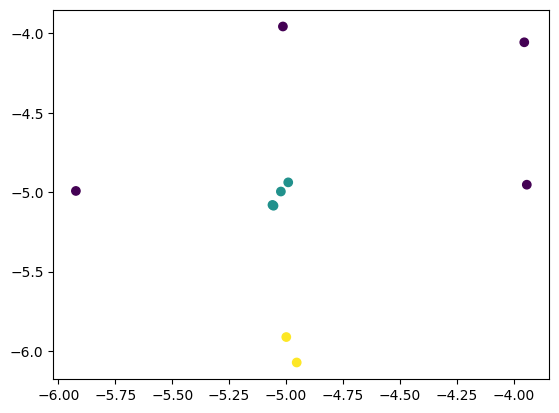

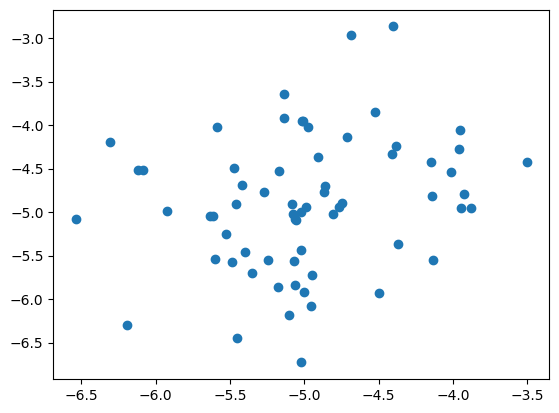

0.3897370518578096
0
[[-5.02248039 -4.99588686]
 [-4.99019978 -4.93817774]
 [-5.07409456 -5.01858988]
 [-5.05944398 -5.08029787]
 [-5.05489625 -5.08550689]]
1
[[-4.97329267 -4.02011068]
 [-5.0135407  -3.955765  ]
 [-5.00947168 -3.94872925]]
-1
[[-5.92312685 -4.99228902]
 [-3.94200808 -4.95295439]]


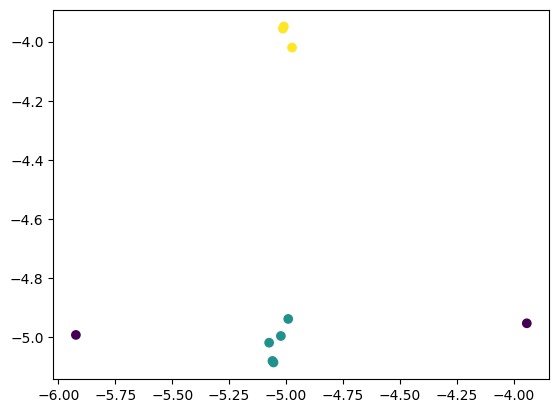

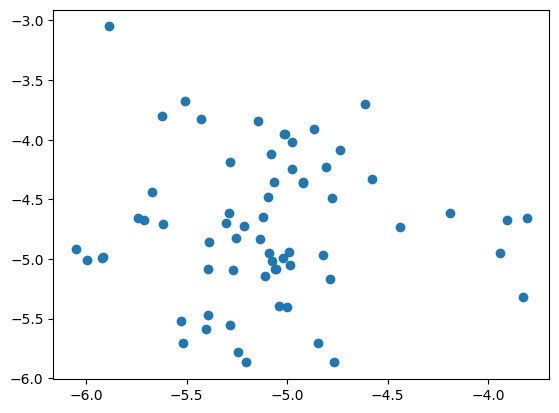

0.26914941006289267
0
[[-5.02248039 -4.99588686]
 [-4.98786987 -5.05024043]
 [-4.99019978 -4.93817774]
 [-5.07409456 -5.01858988]
 [-5.05944398 -5.08029787]]
1
[[-5.99491933 -5.00506508]
 [-5.92312685 -4.99228902]]
2
[[-4.97329267 -4.02011068]
 [-5.0135407  -3.955765  ]
 [-5.00947168 -3.94872925]]


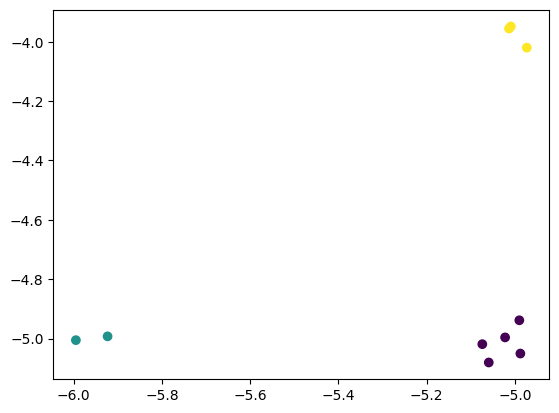

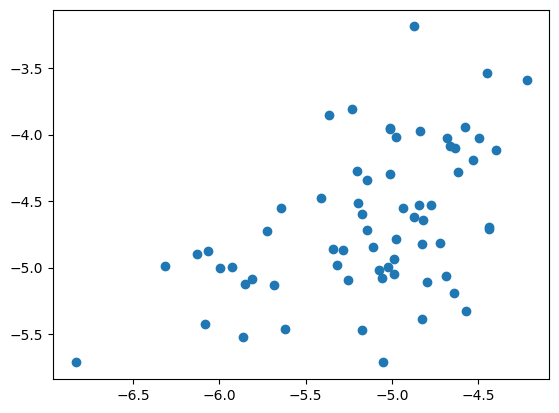

0.26914941006289267
0
[[-5.02248039 -4.99588686]
 [-4.98786987 -5.05024043]
 [-4.99019978 -4.93817774]
 [-5.07409456 -5.01858988]
 [-5.05944398 -5.08029787]]
1
[[-5.99491933 -5.00506508]
 [-5.92312685 -4.99228902]]
2
[[-4.97329267 -4.02011068]
 [-5.0135407  -3.955765  ]
 [-5.00947168 -3.94872925]]


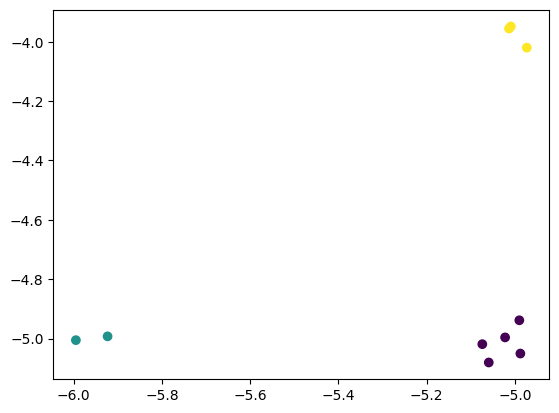

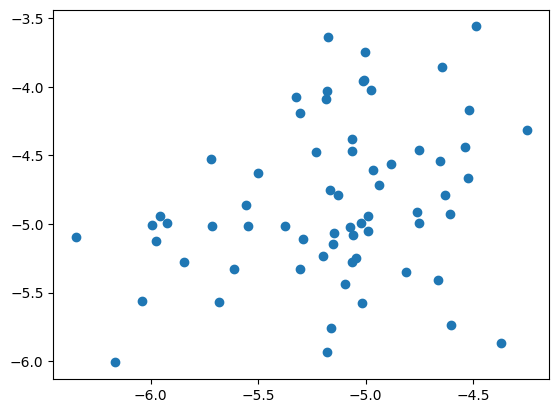

0.26914941006289267
0
[[-5.02248039 -4.99588686]
 [-4.98786987 -5.05024043]
 [-4.99019978 -4.93817774]
 [-5.07409456 -5.01858988]
 [-5.05944398 -5.08029787]]
1
[[-5.99491933 -5.00506508]
 [-5.95708766 -4.94371914]]
2
[[-4.97329267 -4.02011068]
 [-5.0135407  -3.955765  ]
 [-5.00947168 -3.94872925]]


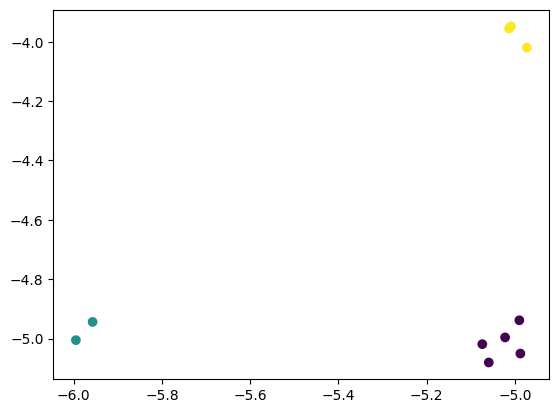

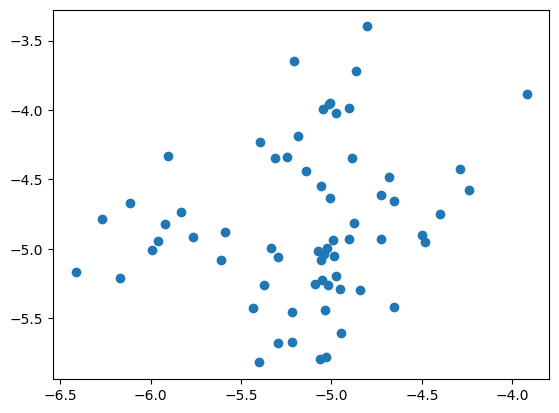

0.26539223044796717
0
[[-5.02248039 -4.99588686]
 [-4.98786987 -5.05024043]
 [-5.04164935 -5.0396711 ]
 [-4.99019978 -4.93817774]
 [-5.07409456 -5.01858988]]
1
[[-4.97329267 -4.02011068]
 [-5.04553776 -3.98964317]
 [-5.0135407  -3.955765  ]
 [-5.00947168 -3.94872925]]
-1
[[-5.99491933 -5.00506508]]


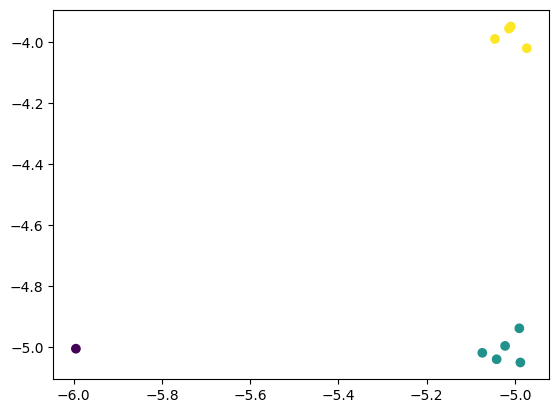

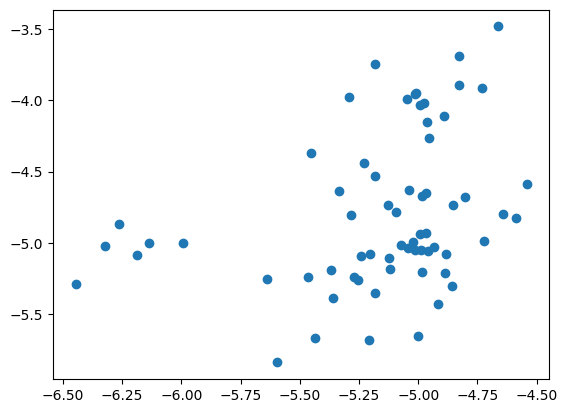

0.2614068742752259
0
[[-5.02248039 -4.99588686]
 [-5.01366288 -5.04942123]
 [-4.98786987 -5.05024043]
 [-5.04164935 -5.0396711 ]
 [-4.99019978 -4.93817774]
 [-4.95879402 -5.05890841]
 [-4.93333419 -5.03009933]
 [-5.07409456 -5.01858988]]
-1
[[-5.99491933 -5.00506508]
 [-4.99148723 -4.02923856]]


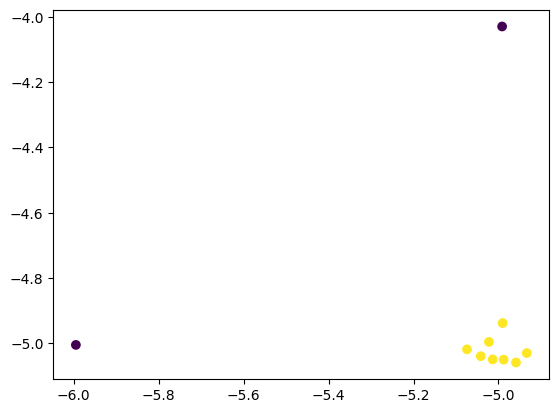

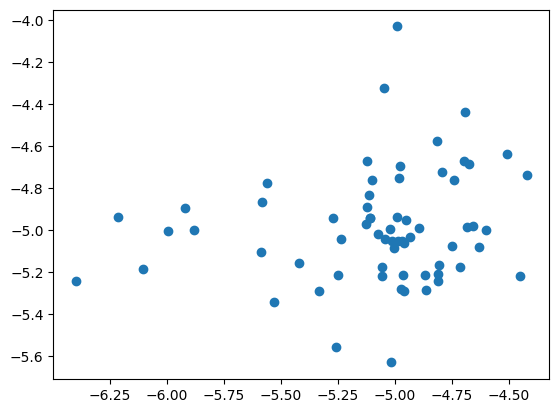

0.14778947626640693
0
[[-5.02248039 -4.99588686]
 [-5.01366288 -5.04942123]
 [-4.98786987 -5.05024043]
 [-5.04164935 -5.0396711 ]
 [-4.96714148 -5.04930037]
 [-4.99019978 -4.93817774]
 [-4.94987437 -4.94893302]
 [-4.95879402 -5.05890841]
 [-4.93333419 -5.03009933]]
-1
[[-5.99491933 -5.00506508]]


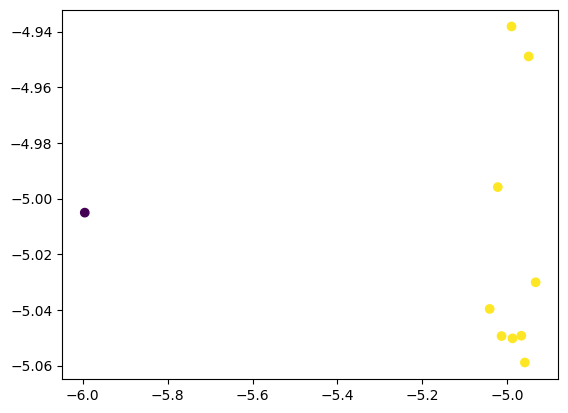

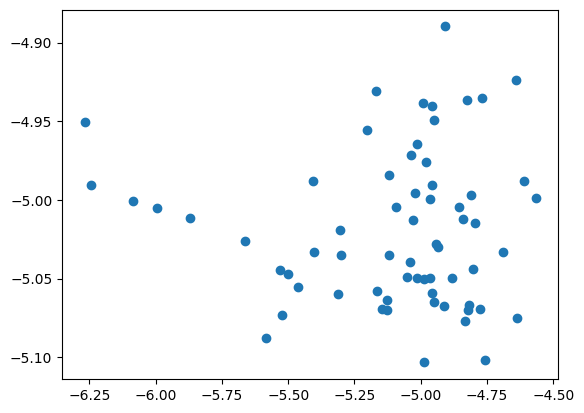

0.021186642001800093
0
[[-5.02248039 -4.99588686]
 [-5.02806456 -5.0127263 ]]
1
[[-4.96693415 -4.9992988 ]
 [-4.95809872 -4.99078159]]
-1
[[-4.97872326 -4.97613732]
 [-5.01417179 -4.96429792]
 [-5.03883059 -4.97114899]
 [-5.01366288 -5.04942123]
 [-4.98786987 -5.05024043]
 [-5.04164935 -5.0396711 ]]


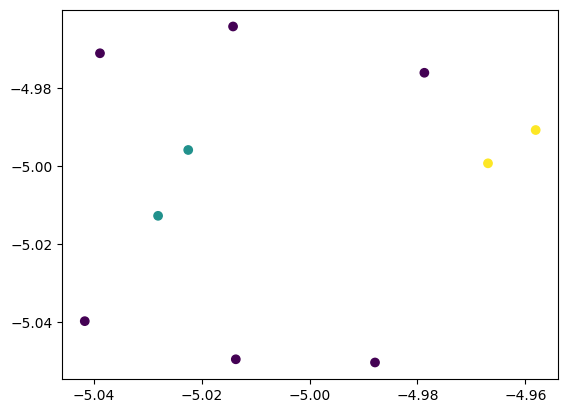

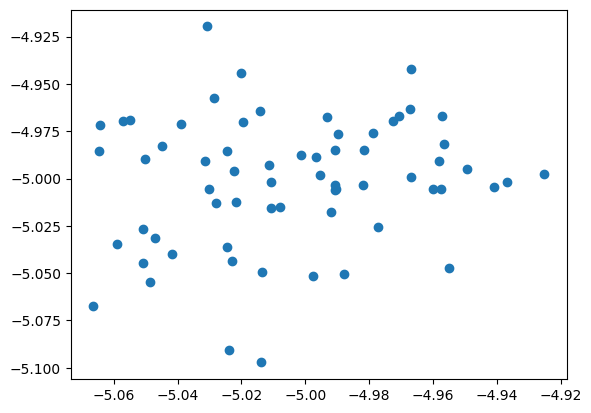

0.006384628904890777
0
[[-4.99061255 -5.0033067 ]
 [-4.99052116 -5.00548973]
 [-4.99054076 -5.00618669]]
1
[[-4.99651267 -4.98883828]
 [-5.00146371 -4.98737443]]
-1
[[-4.99532858 -4.99800877]
 [-5.01088532 -5.00199874]
 [-5.01151747 -4.99304689]
 [-5.00786042 -5.01479202]
 [-4.99073286 -4.9847113 ]]


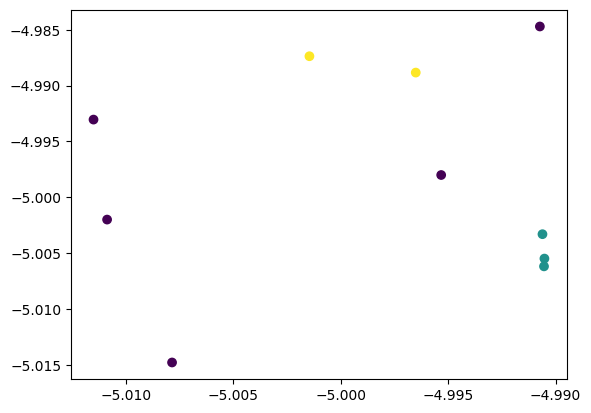

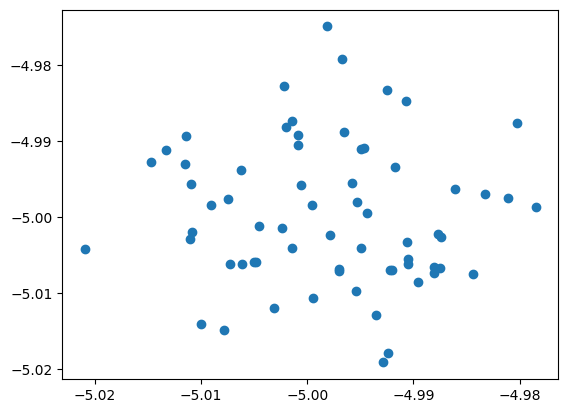

0.002323243368624439
0
[[-5.00236984 -5.00149151]
 [-5.00456838 -5.00113155]]
1
[[-4.99532858 -4.99800877]
 [-4.9944149  -4.99942906]]
-1
[[-4.9995877  -4.99842172]
 [-4.99784547 -5.0023701 ]
 [-5.00059662 -4.99584896]
 [-5.00146659 -5.00399945]
 [-4.99581292 -4.99556698]
 [-4.99491875 -5.00399876]]


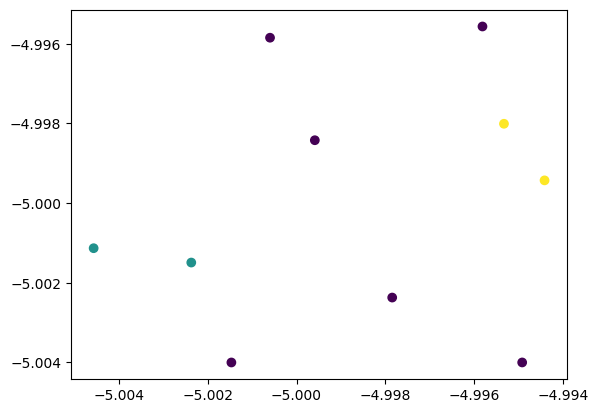

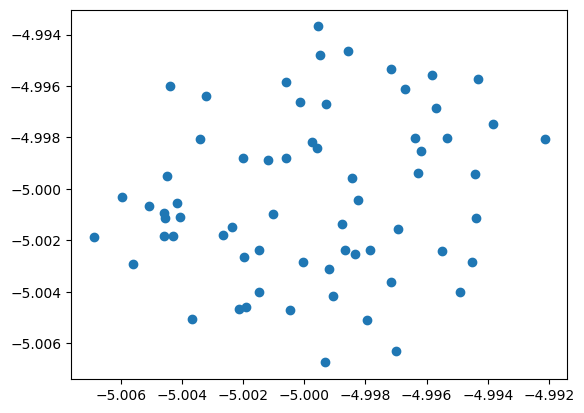

0.0009938990349726007
0
[[-5.00059374 -4.998786  ]
 [-5.00119492 -4.99889594]
 [-5.00199111 -4.9988086 ]]
1
[[-4.99844404 -4.99955926]
 [-4.99823849 -5.00042723]]
2
[[-4.9995877  -4.99842172]
 [-4.99975744 -4.99819154]]
-1
[[-5.00103072 -5.00097732]
 [-4.9987636  -5.00136953]
 [-4.99867231 -5.00239012]]


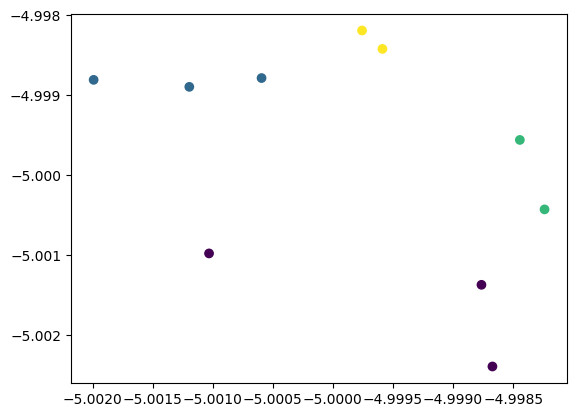

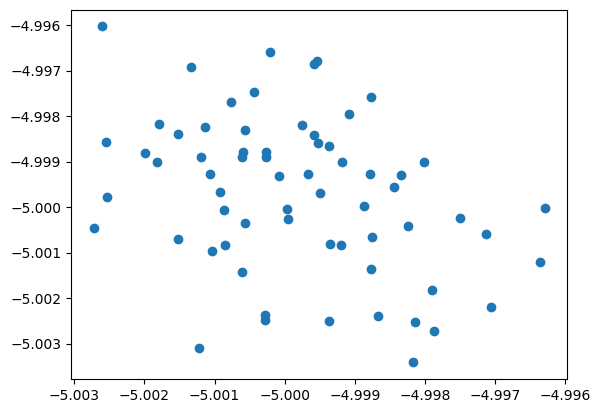

0.0004489666681436466
0
[[-4.99996505 -5.00004052]
 [-4.99995102 -5.00025999]]
1
[[-4.99949258 -4.99968718]
 [-5.00007771 -4.99932   ]
 [-4.99966546 -4.99928189]]
2
[[-5.00055994 -5.00034397]
 [-5.00086097 -5.00007615]
 [-5.00092705 -4.99966495]]
-1
[[-4.99935675 -5.0008122 ]
 [-4.99886562 -4.99996909]]


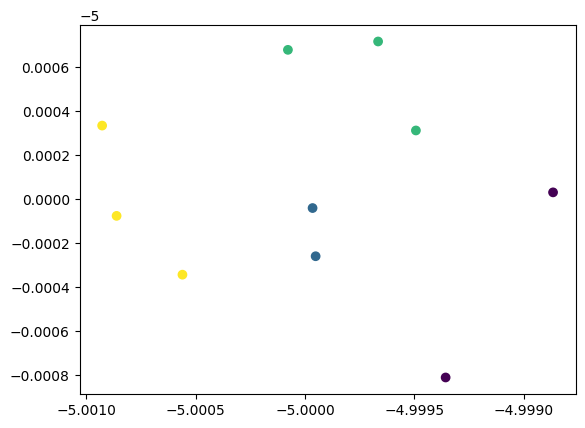

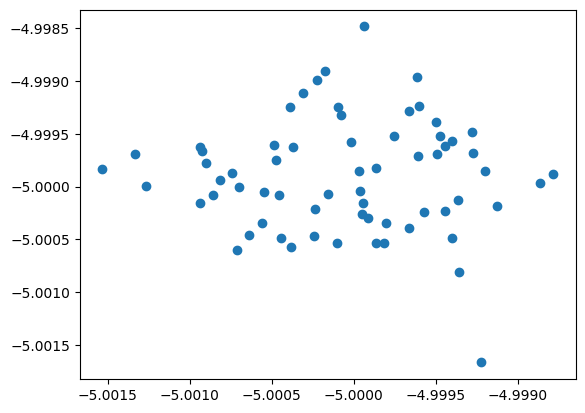

0.00014965937632571702
0
[[-4.99996505 -5.00004052]
 [-4.99994234 -5.00015967]
 [-4.99995102 -5.00025999]
 [-4.99991422 -5.00030164]
 [-4.99980241 -5.00034714]]
1
[[-4.99997093 -4.99984846]
 [-4.99986354 -4.99982713]]
-1
[[-5.00015438 -5.00007075]
 [-5.00023366 -5.00021351]
 [-5.00001604 -4.99958112]]


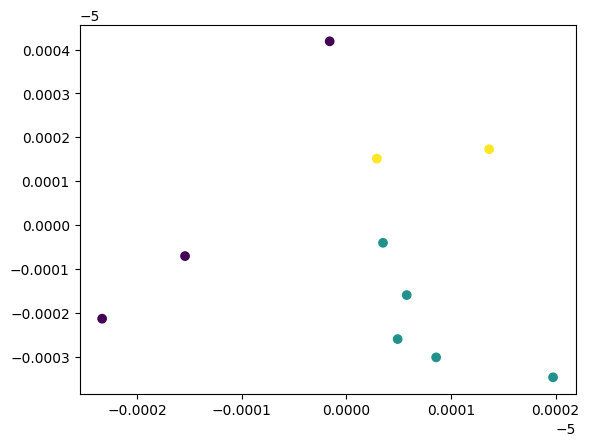

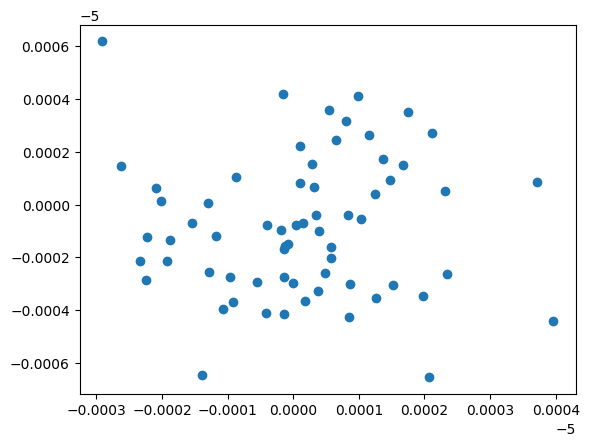

4.0569366979714694e-05
0
[[-4.99996505 -5.00004052]
 [-4.99998503 -5.00007002]
 [-4.99999605 -5.00007778]
 [-5.00004046 -5.00007944]
 [-5.00001822 -5.00009707]
 [-4.99996112 -5.00009957]]
1
[[-4.99996877 -4.99993466]
 [-4.99998947 -4.99991934]]
2
[[-4.99991716 -5.00003822]
 [-4.99989614 -5.00005489]]


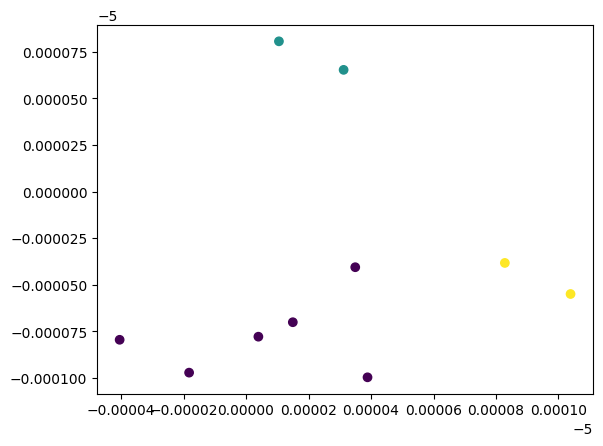

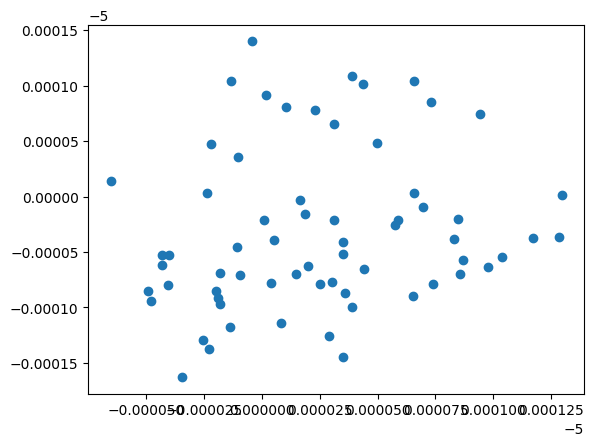

1.8997330611947305e-05
0
[[-4.99998335 -5.00000279]
 [-4.99999903 -5.00002076]
 [-4.99998117 -5.00001576]
 [-4.99996893 -5.00002095]
 [-4.99999477 -5.00003879]
 [-5.00001058 -5.00004582]]
1
[[-5.00001039 -4.99996454]
 [-5.00002187 -4.99995251]]
-1
[[-5.00002371 -4.99999683]
 [-4.99996505 -5.00004052]]


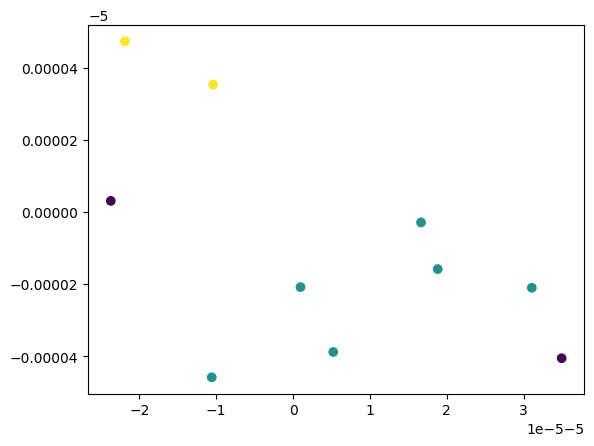

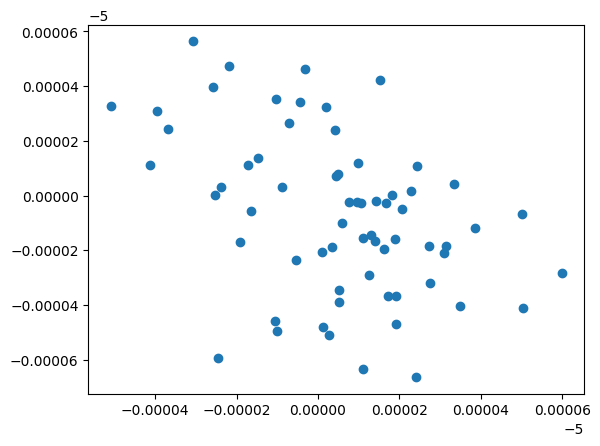

5.894072441781084e-06
0
[[-4.99999243 -5.00000236]
 [-4.99999035 -5.00000236]
 [-4.99998946 -5.0000026 ]
 [-4.99998572 -5.00000194]
 [-4.99998335 -5.00000279]]
1
[[-4.99999547 -4.99999284]
 [-4.999995   -4.999992  ]]
-1
[[-5.00000878 -4.9999967 ]
 [-4.99999421 -5.0000099 ]
 [-4.99999015 -4.99998817]]


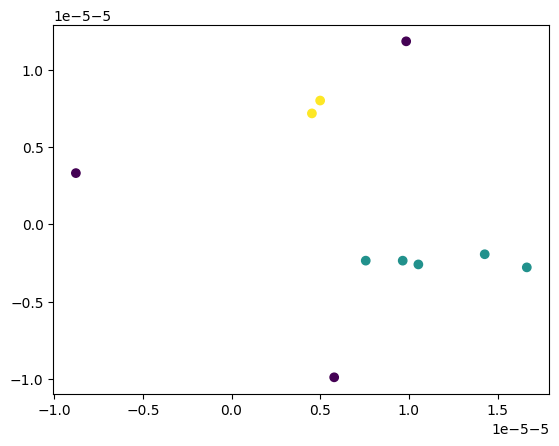

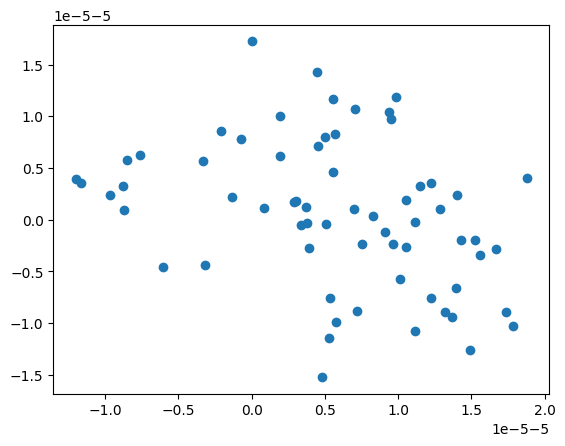

1.851379243578144e-06
0
[[-4.99999714 -4.9999983 ]
 [-4.99999663 -5.00000047]
 [-4.99999695 -4.99999816]
 [-4.99999619 -5.00000031]
 [-4.99999631 -4.99999879]
 [-4.99999493 -5.0000004 ]]
-1
[[-4.99999913 -4.99999887]
 [-5.00000132 -4.99999781]
 [-4.99999607 -5.00000271]
 [-5.0000032  -5.00000435]]


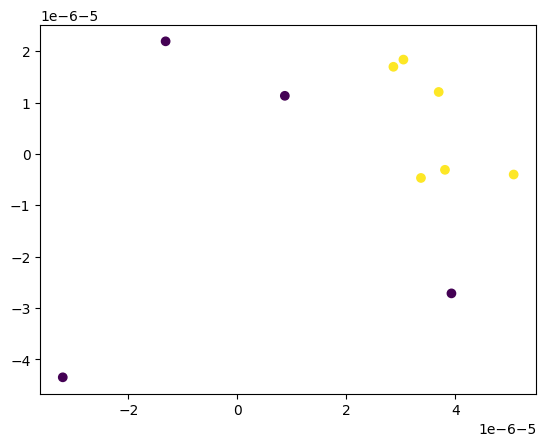

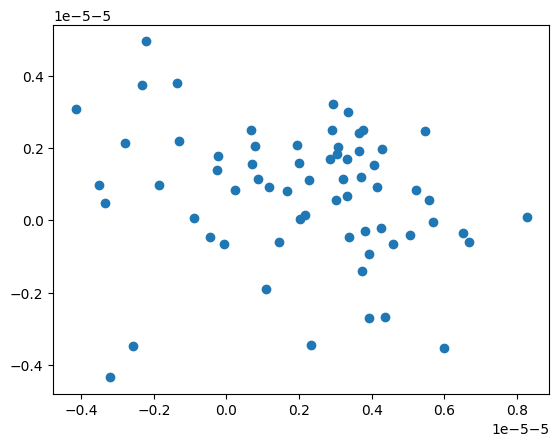

5.96646548944868e-07
0
[[-5.00000006 -5.00000065]
 [-5.00000046 -5.00000046]]
1
[[-5.00000027 -4.99999861]
 [-5.00000025 -4.99999821]]
2
[[-4.99999913 -4.99999887]
 [-4.99999882 -4.99999908]
 [-4.9999993  -4.99999845]]
-1
[[-4.99999978 -4.99999915]
 [-5.0000009  -4.99999994]
 [-4.99999856 -5.00000061]]


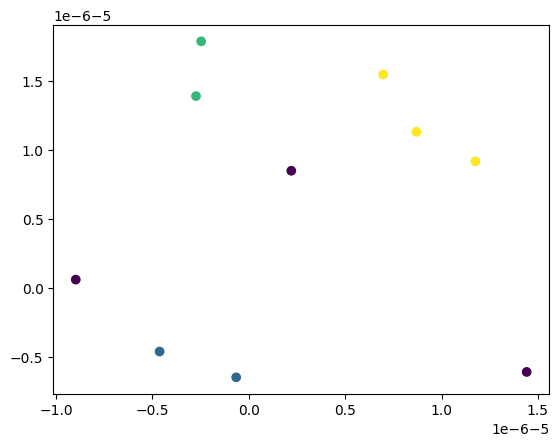

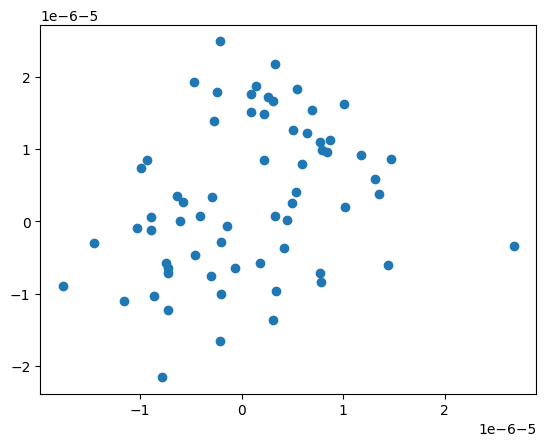

2.531101378488998e-07
0
[[-5.00000015 -5.00000006]
 [-5.00000021 -5.00000029]]
1
[[-4.99999967 -4.99999993]
 [-4.99999955 -4.99999998]
 [-4.99999951 -4.99999975]]
2
[[-5.00000041 -4.99999993]
 [-5.00000061 -5.        ]]
-1
[[-5.00000029 -4.99999966]
 [-4.99999959 -5.00000036]
 [-4.99999982 -5.00000058]]


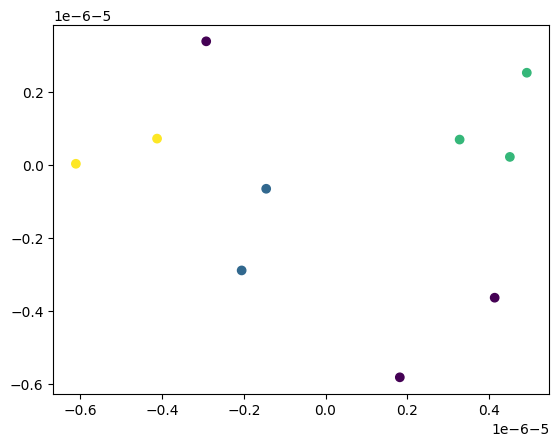

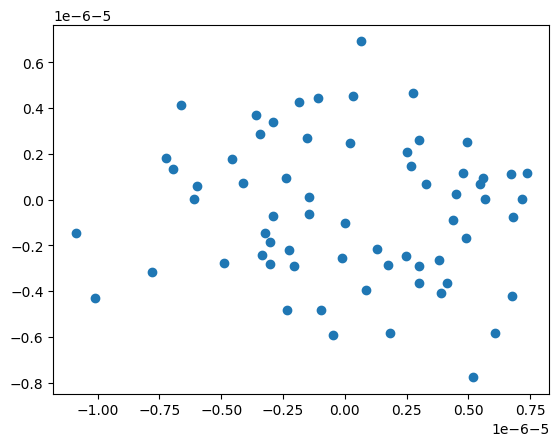

1.3533301235213457e-07
0
[[-5.00000014 -4.99999999]
 [-5.00000015 -5.00000006]
 [-5.00000024 -4.99999991]]
1
[[-4.99999987 -5.00000021]
 [-5.00000001 -5.00000026]]
-1
[[-5.         -5.0000001 ]
 [-4.99999998 -4.99999975]
 [-5.00000029 -5.00000007]
 [-4.99999973 -4.99999985]
 [-5.00000015 -4.99999973]]


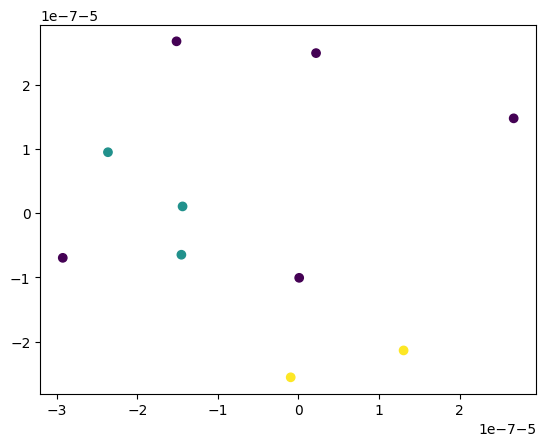

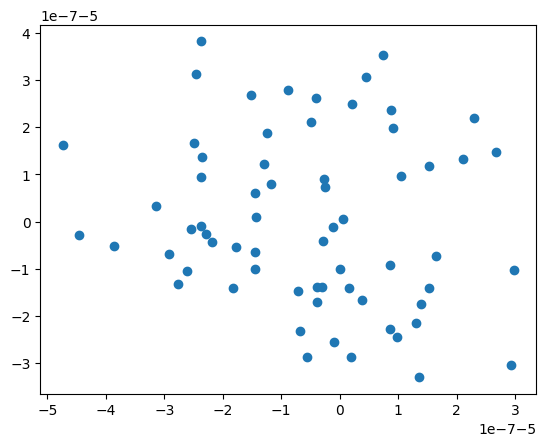

5.436039607342735e-08
0
[[-4.99999999 -5.        ]
 [-5.00000001 -5.00000001]
 [-5.00000003 -5.00000004]
 [-5.00000003 -4.99999993]
 [-5.         -5.0000001 ]
 [-4.99999991 -5.00000009]
 [-5.00000003 -5.00000014]
 [-5.00000012 -4.99999992]]
-1
[[-5.00000003 -4.99999991]
 [-4.99999998 -5.00000014]]


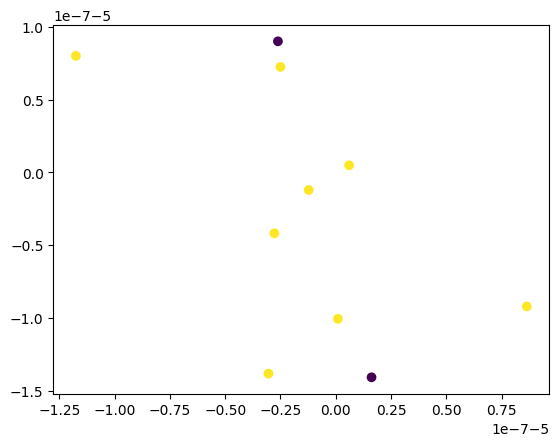

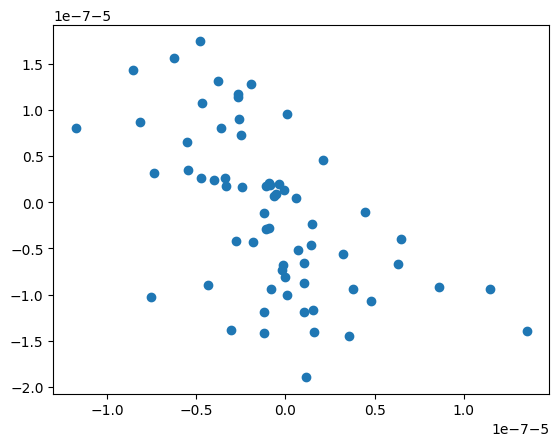

8.989311961471458e-09
0
[[-4.99999999 -5.        ]
 [-5.00000001 -4.99999999]
 [-5.00000001 -4.99999999]
 [-5.         -4.99999999]
 [-5.00000001 -5.00000001]
 [-5.         -4.99999998]
 [-5.00000001 -4.99999998]
 [-5.00000001 -4.99999998]
 [-5.00000001 -4.99999998]]
-1
[[-4.99999998 -5.00000002]]


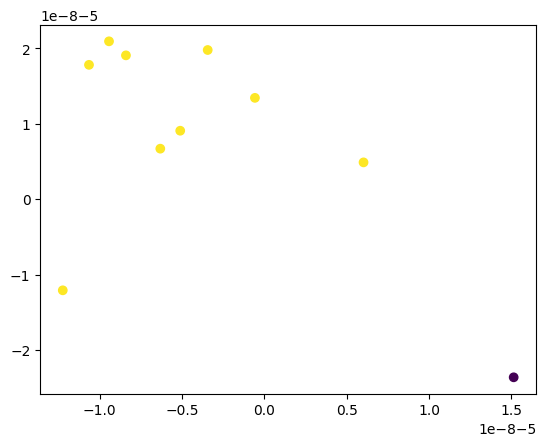

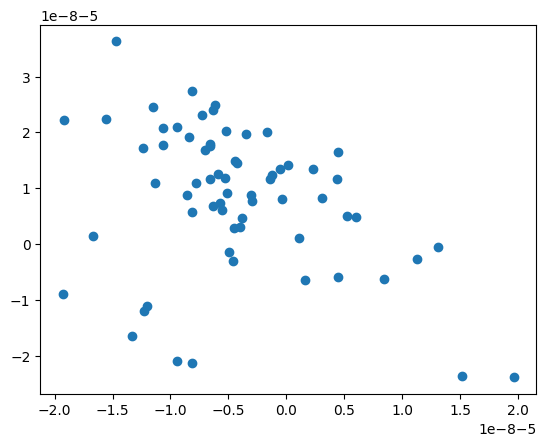

2.8010659347543765e-09
0
[[-5.         -5.        ]
 [-5.         -5.        ]
 [-5.         -5.        ]
 [-5.         -5.        ]
 [-5.         -5.        ]
 [-5.         -5.        ]
 [-4.99999999 -5.        ]
 [-5.         -5.00000001]
 [-5.         -5.00000001]
 [-4.99999999 -5.        ]]


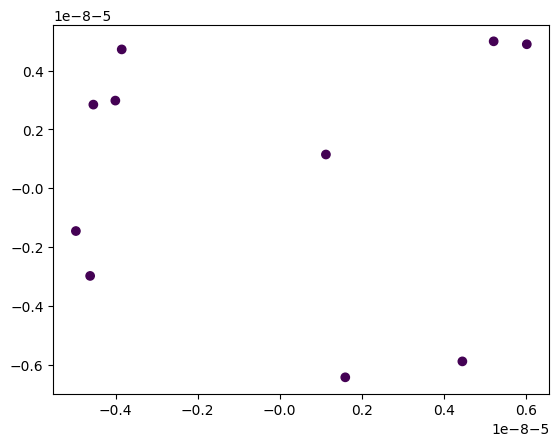

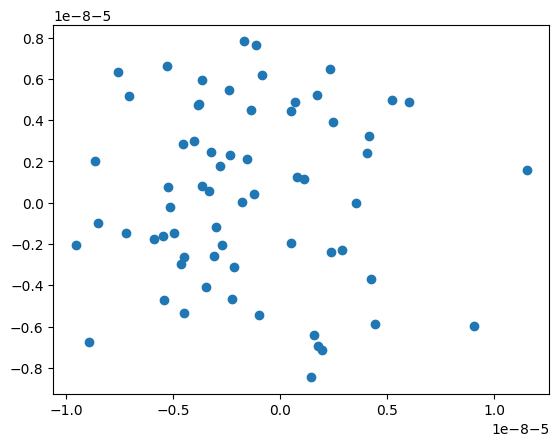

1.407841399014842e-09
0
[[-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]]


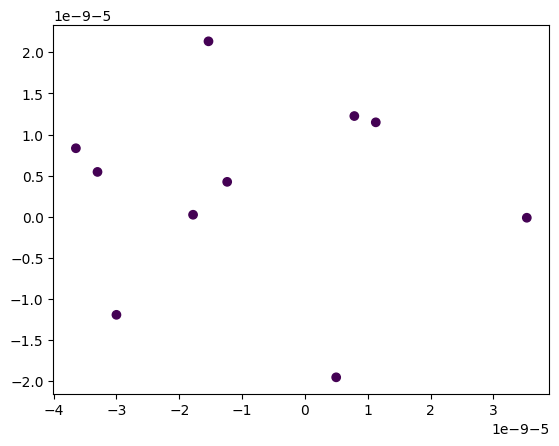

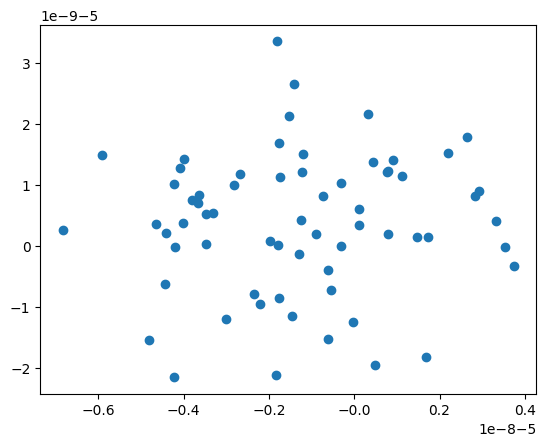

8.415569352493435e-10
0
[[-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]]


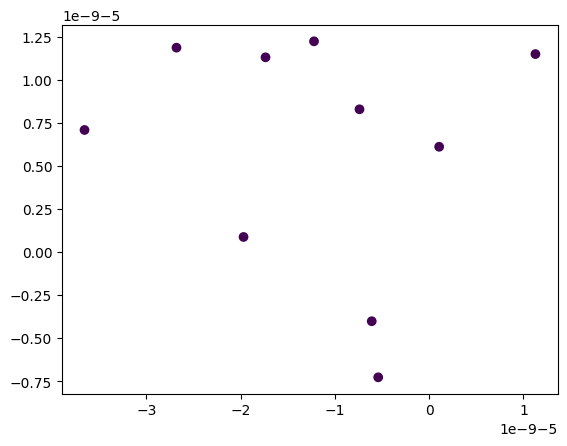

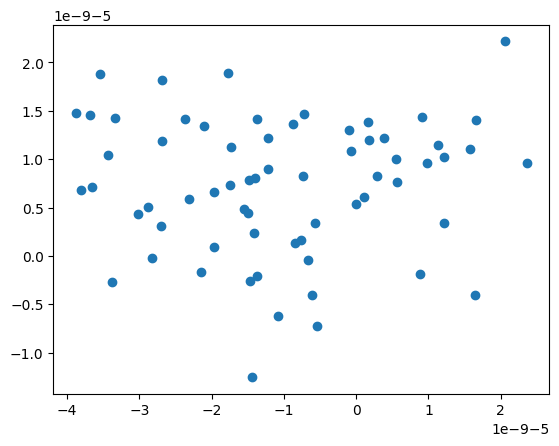

7.737758211945334e-10
0
[[-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]]


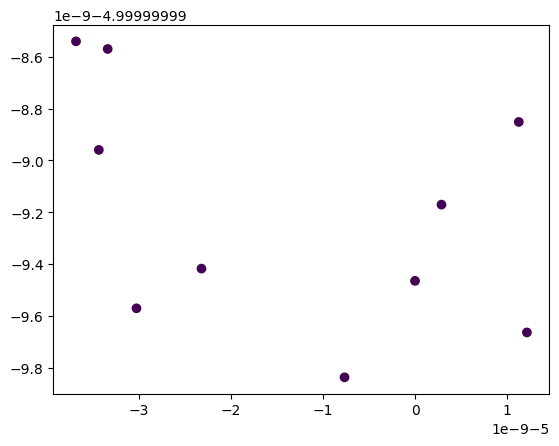

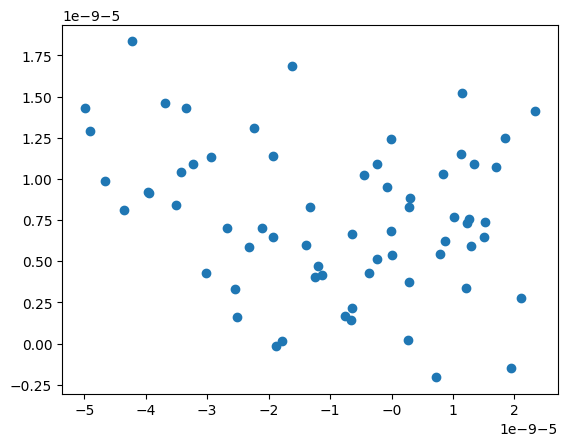

6.068437974349195e-10
0
[[-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]]


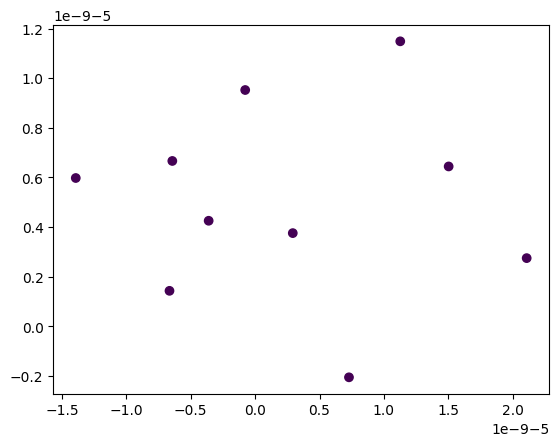

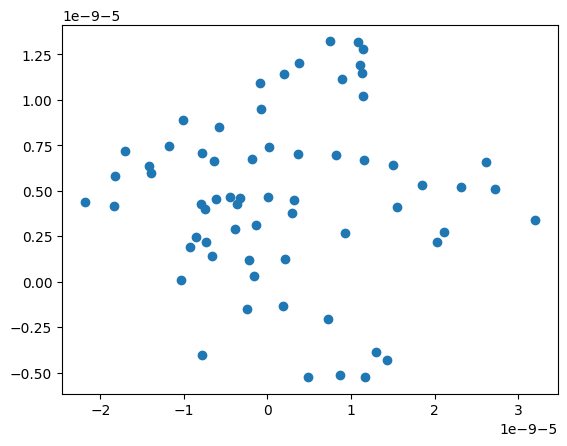

5.841558348151921e-10
0
[[-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]
 [-5. -5.]]


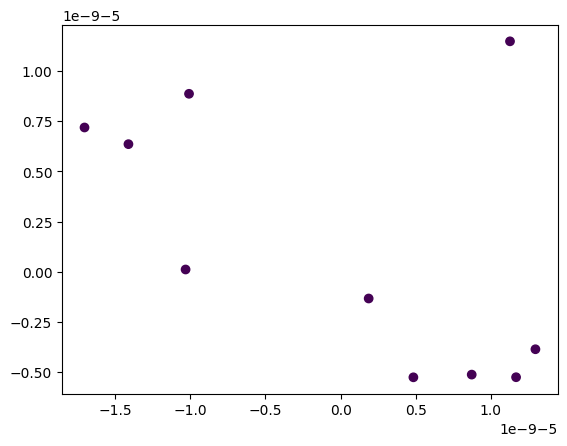

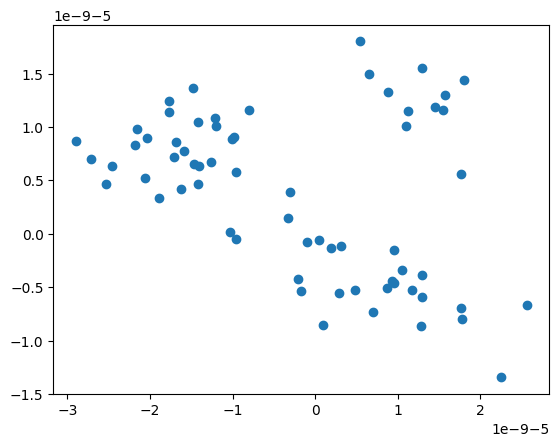

19.58563756942749


In [29]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S1           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points


  epsilon = 2.5*np.mean(np.max(x, axis=0)-np.min(x, axis=0))/NS
  print(epsilon)
  clustering = DBSCAN(eps=epsilon, min_samples=2).fit(x)
  CovDic = dict()
  for i in set(clustering.labels_):
    print(i)
    print(x[np.where(clustering.labels_ == i)])
    # CovDic[i] =
  clustering.labels_

  # clustering
  plt.scatter(x[:,0], x[:,1], c = clustering.labels_)
  plt.show()



  a = np.power(0.3, (it/MAXIT))


  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  plt.scatter(x[:,0], x[:,1])
  plt.show()
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

In [30]:
# it clearly Doesn't work well at clustering
xb

[array([-3.9019193 , -5.06175128]),
 array([-5.92312685, -4.99228902]),
 array([-5.92312685, -4.99228902]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-5.02248039, -4.99588686]),
 array([-4.99532858, -4.99800877]),
 array([-4.9995877 , -4.99842172]),
 array([-5.00059374, -4.998786  ]),
 array([-4.99996505, -5.00004052]),
 array([-4.99996505, -5.00004052]),
 array([-4.99996505, -5.00004052]),
 array([-4.99998335, -5.00000279]),
 array([-4.99999243, -5.00000236]),
 array([-4.99999913, -4.9999

In [24]:
CovDic = dict()

In [26]:
CovDic[0] = np.array([1,2])
CovDic[2] = np.array([1,2])
CovDic

{0: array([1, 2]), 2: array([1, 2])}

### The Clustering

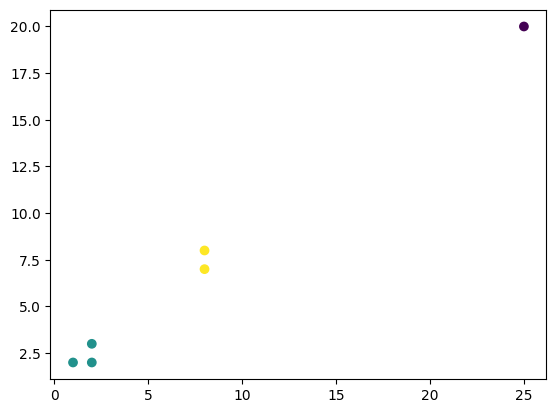

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 20]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
# clustering
plt.scatter(X[:,0], X[:,1], c = clustering.labels_)
plt.show()

3.3618850730074867


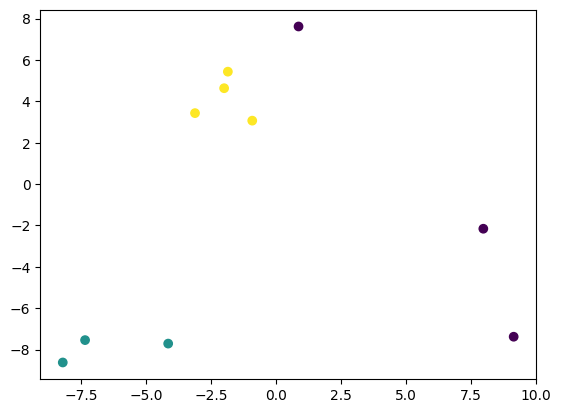

In [ ]:
NS = 10
NP = NS * (NS + 3) // 2
R = np.array([[-10, 10], [-10, 10]])
X = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation

ind = np.argsort(f)
X = X[ind[:NS]]                                         # choosing the best points

epsilon = 2*np.mean(np.max(X, axis=0)-np.min(X, axis=0))/NS
print(epsilon)
clustering = DBSCAN(eps=epsilon, min_samples=2).fit(X)
clustering.labels_
# clustering
plt.scatter(X[:,0], X[:,1], c = clustering.labels_)
plt.show()

In [ ]:
set(clustering.labels_)

{-1, 0, 1}

In [ ]:
np.vstack([np.max(X, axis=0),np.min(X, axis=0)])

array([[ 9.68586759,  9.72976385],
       [-9.67597131, -9.31319654]])

In [ ]:
np.mean(np.max(X, axis=0)-np.min(X, axis=0))

19.28503244190822

## hierarchy

### simple

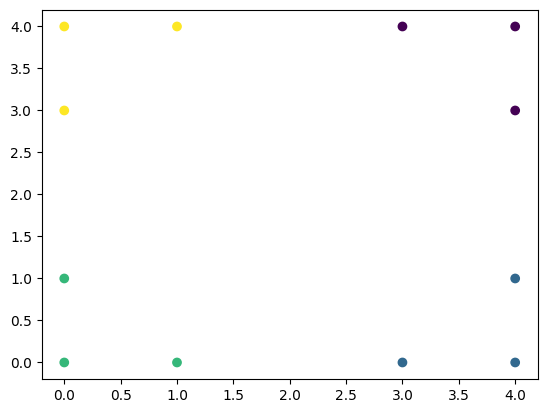

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0],
              [0, 4], [0, 3], [1, 4],
              [4, 0], [3, 0], [4, 1],
              [4, 4], [3, 4], [4, 3]])
clustering = sp.cluster.hierarchy.fclusterdata(X, t=1)
# plot
plt.scatter(X[:,0], X[:,1], c = clustering)
plt.show()

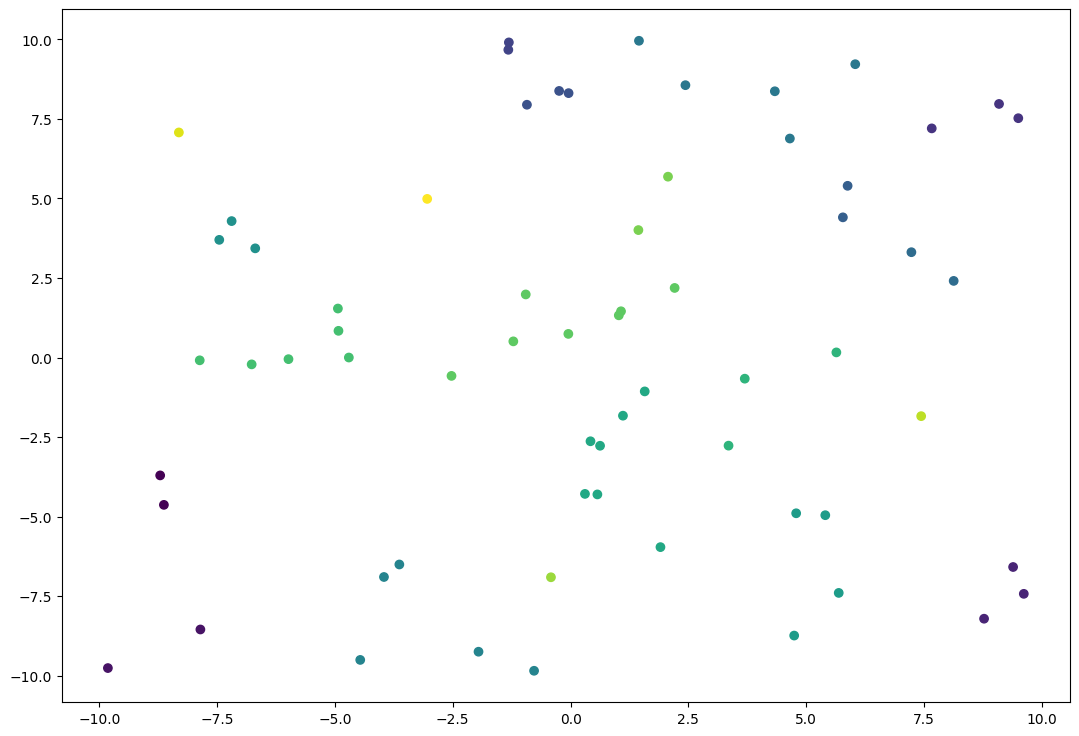

In [ ]:
NS = 10
NP = NS * (NS + 3) // 2
R = np.array([[-10, 10], [-10, 10]])
X = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))

clustering = sp.cluster.hierarchy.fclusterdata(X, t=1)
# plot
plt_1 = plt.figure(figsize=(13, 9))
plt.scatter(X[:,0], X[:,1], c = clustering)
plt.show()

### Advances

In [ ]:
X = [[0, 0], [0, 1], [1, 0],
     [0, 4], [0, 3], [1, 4],
     [4, 0], [3, 0], [4, 1],
     [4, 4], [3, 4], [4, 3]]
y = sp.spatial.distance.pdist(X)
y.shape

(66,)

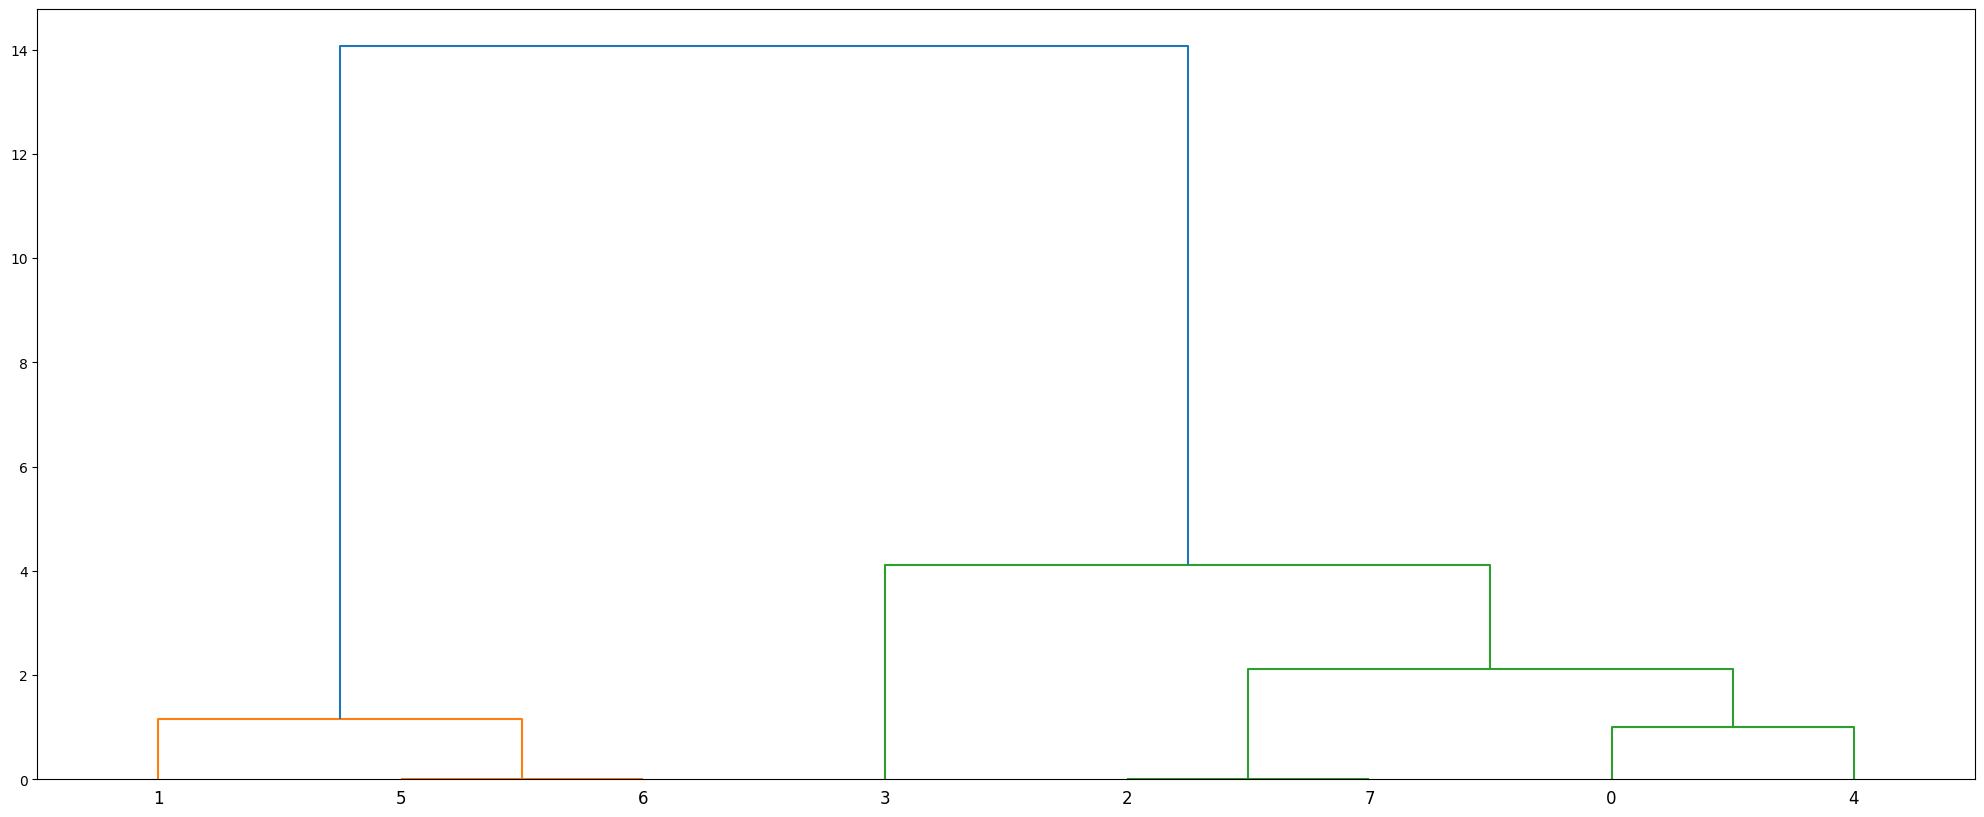

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 1.        ,  8.        ,  1.15470054,  3.        ],
       [ 9.        , 10.        ,  2.12132034,  4.        ],
       [ 3.        , 12.        ,  4.11096096,  5.        ],
       [11.        , 13.        , 14.07183949,  8.        ]])

In [ ]:
from scipy.cluster.hierarchy import single, fcluster, linkage
from scipy.spatial.distance import pdist

In [ ]:
X = [[0, 0], [0, 1], [1, 0],
     [0, 4], [0, 3], [1, 4],
     [4, 0], [3, 0], [4, 1],
     [4, 4], [3, 4], [4, 3],]
y = pdist(X)
Z = linkage(y, 'ward')
Z

array([[ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 3.        ,  4.        ,  1.        ,  2.        ],
       [ 6.        ,  7.        ,  1.        ,  2.        ],
       [ 9.        , 10.        ,  1.        ,  2.        ],
       [ 2.        , 12.        ,  1.29099445,  3.        ],
       [ 5.        , 13.        ,  1.29099445,  3.        ],
       [ 8.        , 14.        ,  1.29099445,  3.        ],
       [11.        , 15.        ,  1.29099445,  3.        ],
       [16.        , 17.        ,  5.77350269,  6.        ],
       [18.        , 19.        ,  5.77350269,  6.        ],
       [20.        , 21.        ,  8.16496581, 12.        ]])

## something else

# Useless

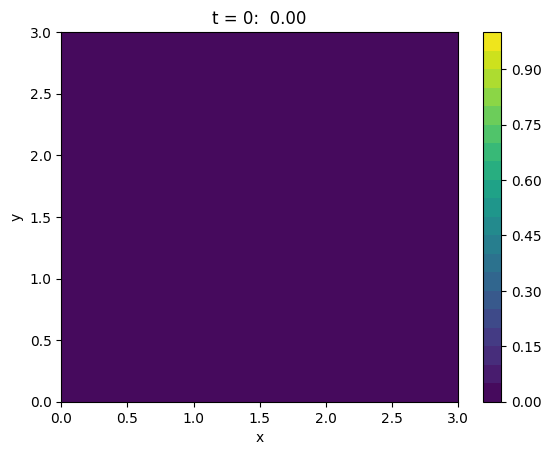

In [ ]:
import pylab as plt
import numpy
import matplotlib.animation as animation
#plt.rcParams['animation.ffmpeg_path'] = r"C:\some_path\ffmpeg.exe"   # if necessary

# Generate data for plotting
Lx = Ly = 3
Nx = Ny = 11
Nt = 20
x = numpy.linspace(0, Lx, Nx)
y = numpy.linspace(0, Ly, Ny)
x,y = numpy.meshgrid(x,y)
z0 = numpy.exp(-(x-Lx/2)**2-(y-Ly/2)**2)   # 2 dimensional Gaussian

def some_data(i):   # function returns a 2D data array
    return z0 * (i/Nt)

fig = plt.figure()
ax = plt.axes(xlim=(0, Lx), ylim=(0, Ly), xlabel='x', ylabel='y')

cvals = numpy.linspace(0,1,Nt+1)      # set contour values
cont = plt.contourf(x, y, some_data(0), cvals)    # first image on screen
plt.colorbar()

# animation function
def animate(i):
    global cont
    z = some_data(i)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x, y, z, cvals)
    plt.title('t = %i:  %.2f' % (i,z[5,5]))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, repeat=False)
anim.save('animation.mp4', writer=animation.FFMpegWriter())

In [ ]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:
import plotly.graph_objects as go

import numpy as np


# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2
vx = 1 + 2 * s
vy = 1 - 2 * s  # v=(vx, vy) is the velocity
speed = np.sqrt(vx ** 2 + vy ** 2)
ux = vx / speed  # (ux, uy) unit tangent vector, (-uy, ux) unit normal vector
uy = vy / speed

xend = xx + ux  # end coordinates for the unit tangent vector at (xx, yy)
yend = yy + uy

xnoe = xx - uy  # end coordinates for the unit normal vector at (xx,yy)
ynoe = yy + ux


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     name="frame",
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     name="curve",
                     mode="lines",
                     line=dict(width=2, color="blue"))
          ],
    layout=go.Layout(width=600, height=600,
                     xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                     yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
                     title="Moving Frenet Frame Along a Planar Curve",
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="Play",
                                                     method="animate",
                                                     args=[None])])]),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], xend[k], None, xx[k], xnoe[k]],
            y=[yy[k], yend[k], None, yy[k], ynoe[k]],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(N)]
)

fig.show()

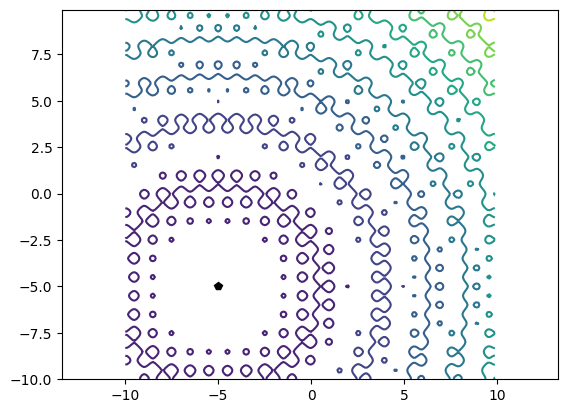

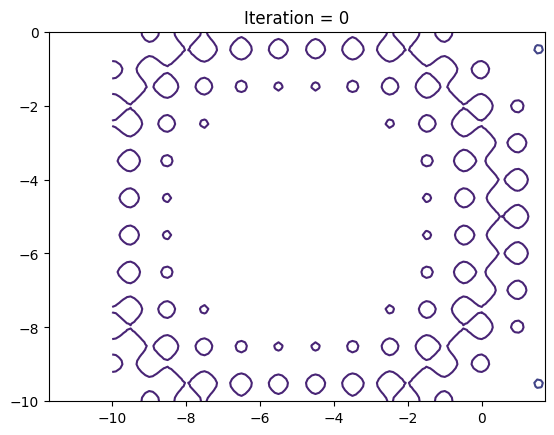

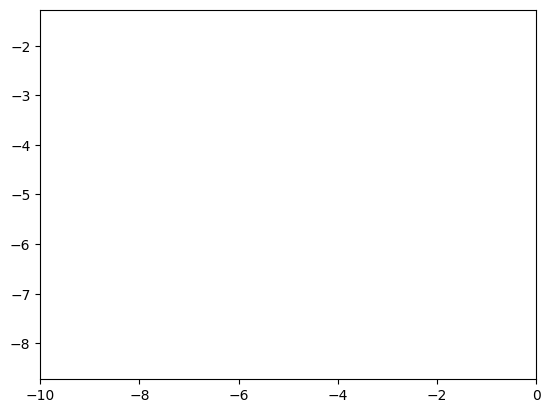

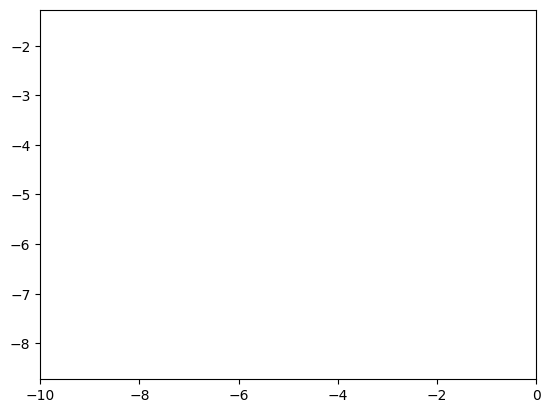

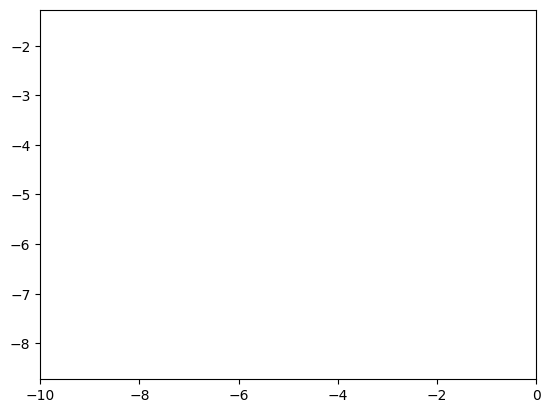

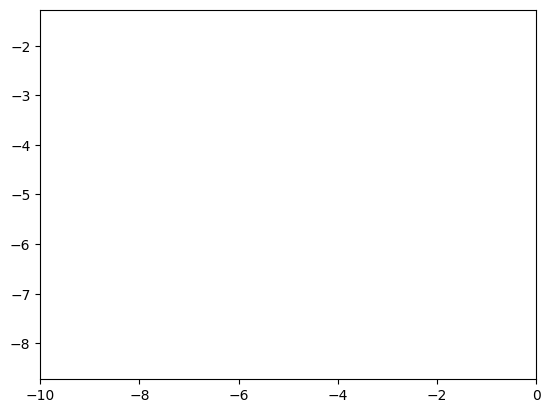

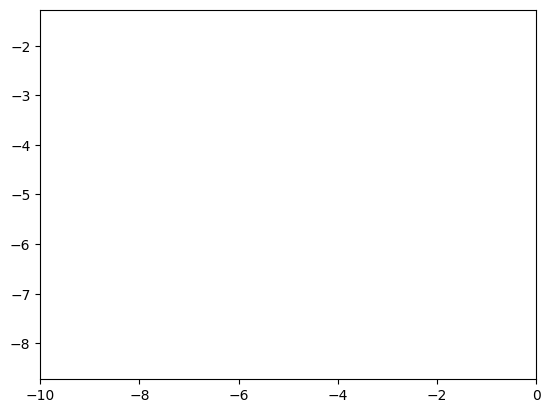

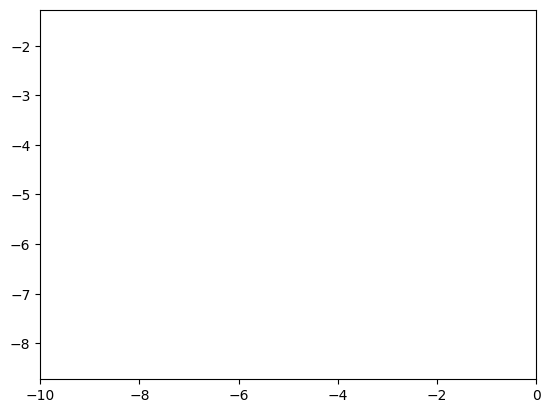

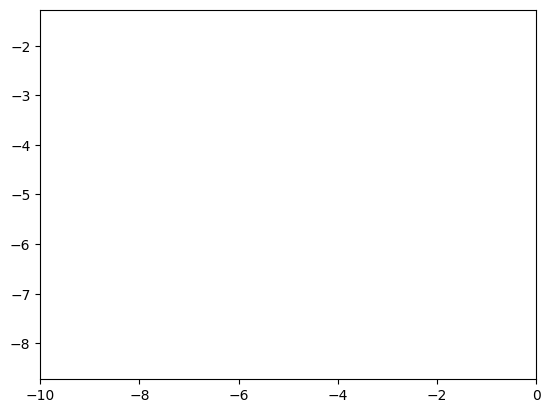

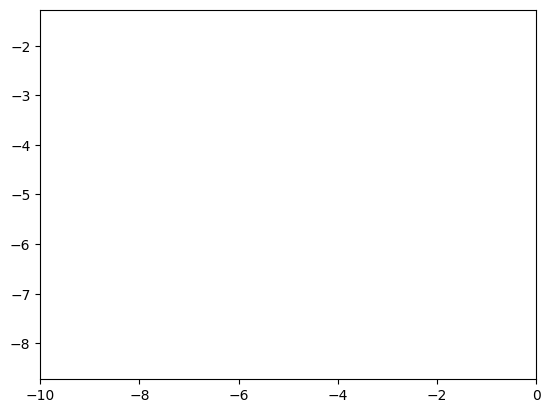

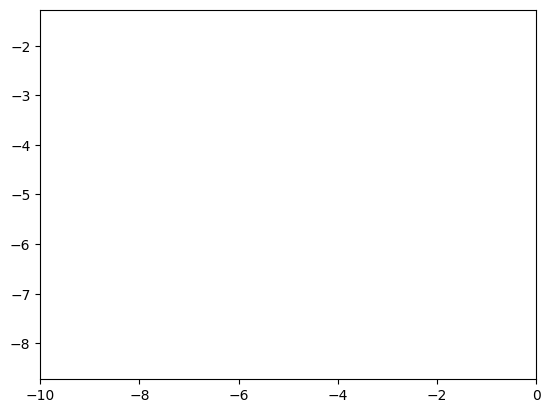

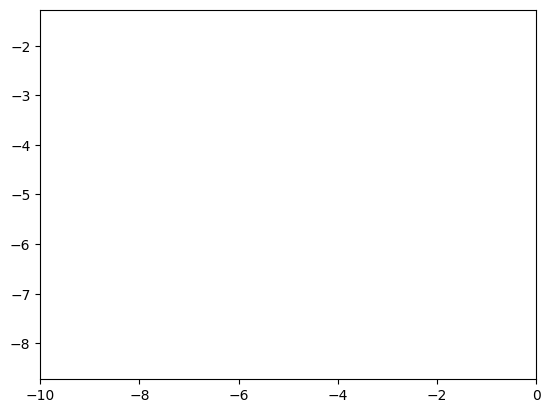

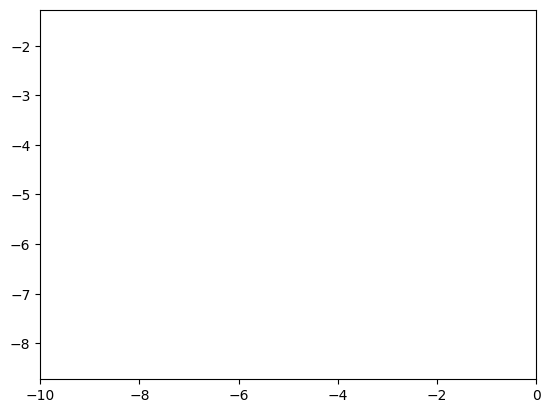

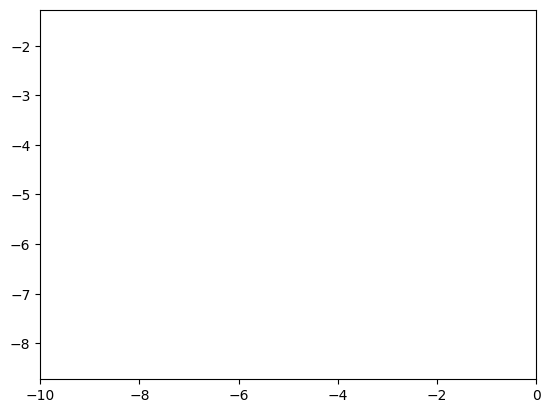

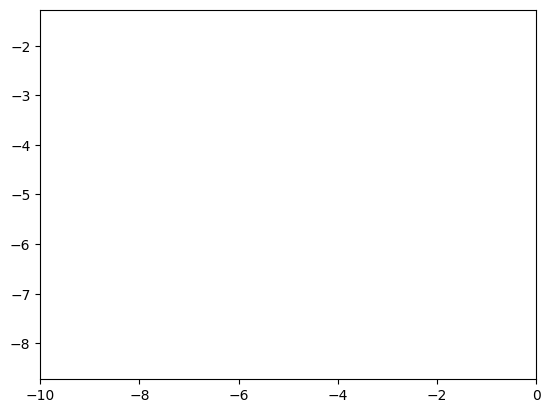

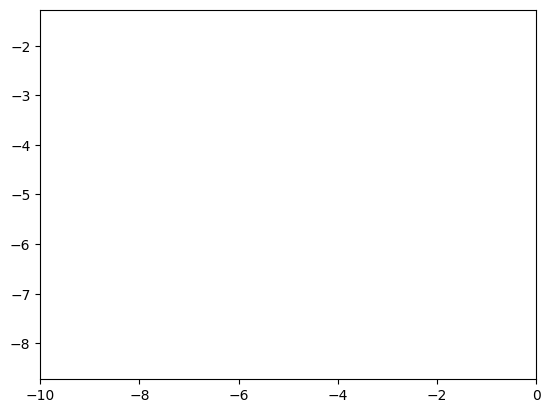

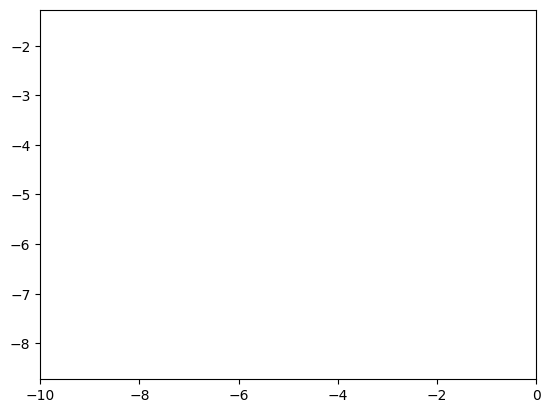

ValueError: operands could not be broadcast together with shapes (150,2) (135,2) (135,2) 

In [ ]:
# MNSV_S1_2.m


import numpy as np
import matplotlib.pyplot as plt

# Define the objective function ObjF_S1
def ObjF_S1(C):
    return np.sum((C + 5)**2 - 10 * np.cos(2 * np.pi * C)) + 20

# Define MNSV Parameters
N = 2                     # Number of variables
NS = 15                   # Number of samples
MAXIT = 30                # Maximum Number of iterations
OBJ_F = 'ObjF_S1'         # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables

# Contour plot setup
xx = np.arange(-10, 10, 0.1)
yy = np.arange(-10, 10, 0.1)
P, Q = np.meshgrid(xx, yy)
F = (P + 5)**2 - 10 * np.cos(2 * np.pi * P) + (Q + 5)**2 - 10 * np.cos(2 * np.pi * Q) + 20

# Plot initial contour and point
plt.contour(xx, yy, F, 10)
plt.plot(-5, -5, 'kp')
plt.axis('equal')
plt.show()
plt.pause(0.5)

# Initialization
NP = int(NS * (NS + 3) / 2)
R1 = np.tile(R[0, :], (NP, 1))
R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R1, R2)
f = np.apply_along_axis(ObjF_S1, 1, x)

# Main loop
Best = np.zeros(MAXIT)
for it in range(MAXIT):
    indices = np.argsort(f)
    x = x[indices[:NS], :]

    # Plot current iteration
    plt.clf()
    plt.contour(xx, yy, F, 10)
    plt.title('Iteration = ' + str(it))
    plt.plot(x[:, 0], x[:, 1], 'r*')
    plt.axis('equal')
    plt.axis([-10, 0, -10, 0])
    plt.show()
    plt.pause(0.5)

    a = (0.3) ** (it / MAXIT)
    z = a * np.var(x, axis=0)

    # Plot ellipses
    t = np.arange(0, 2 * np.pi, 0.01)
    for i in range(NS):
        x1 = x[i, 0] + np.sqrt(z[0]) * np.cos(t)
        y1 = x[i, 1] + np.sqrt(z[1]) * np.sin(t)
        plt.plot(x1, y1)
        plt.axis('equal')
        plt.axis([-10, 0, -10, 0])
        plt.pause(0.1)

    # Generate new samples
    for i in range(NS):
        x = np.vstack([x, np.random.multivariate_normal(x[i, :], np.diag(z), NS + 1 - i)])

    x = np.clip(x, R1, R2)
    f = np.apply_along_axis(ObjF_S1, 1, x)

    fb, j = np.min(f), np.argmin(f)
    xb = x[j, :]
    Best[it] = fb

    print("Iteration:", it + 1)
    print("xmin:", xb)
    print("fmin:", fb)
    print("----")

xmin, fmin = xb, fb
print('Final xmin:', xmin)
print('Final fmin:', fmin)
